In [1]:
import pandas as pd
import json
import numpy as np
import math
from copy import deepcopy

In [2]:
import functools as ft

In [329]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)})

> Link muscle group in exrx and gym building exercises

> Link those with the anatomy of yoga

> seperate anatomy and muscles

>

# Exract Yoga Data

#### Load yoga mapping file

In [3]:
yoga_name_map_df = pd.read_excel("Mapping/new_mapping_master.xlsx", sheet_name = "Yoga Name Mapping")
yoga_name_map_df.tail()

,AlternateName,OriginalName
127,wide-angled seated forward bend,wide-angle seated forward bend
128,wide-legged standing forward bend,wide-legged forward bend
129,wide-legged forward bend pose,wide-legged forward bend
130,warrior pose i,warrior 1 pose
131,warrior ii,warrior 2 pose


In [4]:
yoga_name_map_df.shape

(132, 2)

In [5]:
yoga_name_map = yoga_name_map_df.set_index("AlternateName").to_dict()["OriginalName"]

###### Yoga Name Mapping function

In [6]:
def unifyYogaNames(x):
    name = x.split("|")[0].strip().lower()
    name = name.replace("’", "'")
    if name in yoga_name_map:
        name = yoga_name_map[name]
    return name

#### Load the muscle same as mapping function

In [7]:
same_as_muscles_df = pd.read_excel("Mapping/new_mapping_master.xlsx", sheet_name = "SAME_AS")
same_as_muscles_df.tail()

,alternate_name,name
0,biceps,biceps brachii
1,glutes,gluteus maximus
2,lats,latissimus dorsi
3,quads,quadriceps
4,triceps,triceps brachii


In [8]:
same_as_muscle_map = same_as_muscles_df.set_index('alternate_name').to_dict()['name']

In [9]:
def unifyMuscleNames(x):
    name = x.strip().lower()
    name = name.replace(", ", "-")
    name = name.replace(".html", "")#Specific to an expection
    if name in same_as_muscle_map:
        name = same_as_muscle_map[name]
    return name

## Pose Details

In [10]:
pose_details_dict = {
                 'name':[], 'description':[], 'target_areas':[],'benefits': [],
                 'preparatory_poses':[], 'followup_poses':[],'instructions':[],'variation':[],
                'url': []}

with open('..\Data_Scrape_Yoga\yoga\Extracted\pose_details.jsonl', 'r', encoding="utf8") as json_file:
    json_list = list(json_file)
    
for json_str in json_list:
    result = json.loads(json_str)
    
    pose_details_dict['name'].append(result['name'])
    pose_details_dict['description'].append(result['description'])
    pose_details_dict['target_areas'].append(result['target_areas'])
    pose_details_dict['benefits'].append(result['benefits'])
    pose_details_dict['preparatory_poses'].append(result['preparatory_poses'])
    pose_details_dict['followup_poses'].append(result['followup_poses'])
    pose_details_dict['instructions'].append(result['intructions'])
    pose_details_dict['variation'].append(result['variation'])
    pose_details_dict['url'].append(result['url'])
    
yoga_pose_details_df = pd.DataFrame.from_dict(pose_details_dict)    

In [11]:
yoga_pose_details_df.head()

,name,description,target_areas,benefits,preparatory_poses,followup_poses,instructions,variation,url
0,Child’s Pose,[Child’s Pose (Balasana) centers on creating a...,[Full Body],[Other Child’s Pose perks:],[Balasana can appear at the beginning of class...,[],[Kneel on the floor. Touch your big toes toget...,"[Child’s Pose with a bolster, Begin on your ha...",https://www.yogajournal.com/poses/child-s-pose/
1,Crow Pose | Crane Pose,"[For many of us, our first attempt at an arm b...",[Upper body],[Crow Pose and Crane Pose improve focus and st...,[Chaturanga Dandasana (Four-Limbed Staff Pose)],[Chaturanga Dandasana (Four-Limbed Staff Pose)],"[Begin in a squat with your knees wide apart.,...",[Because Bakasana and Kakasana are so closely ...,https://www.yogajournal.com/poses/crane-pose/
2,Cat Pose,[You will encounter Marjaryasana (Cat Pose) an...,[Core],[Other Cat Pose perks],[Tabletop],[Bitilasana (Cow Pose)],[Begin Tabletop with your hips directly over y...,"[Photo: Andrew Clark, Cat Pose with blocks, If...",https://www.yogajournal.com/poses/cat-pose/
3,Cow Pose,"[Bitilasana (Cow Pose), a backbend, is commonl...",[Core],[Other Cow Pose Perks],"[Marjaryasana (Cat Pose), Balasana (Child’s Po...","[Marjaryasana (Cat Pose), Balasana (Child’s Po...",[Begin in Tabletop with your hips directly ove...,"[Photo: Christopher Dougherty, Cow Pose with b...",https://www.yogajournal.com/poses/cow-pose/
4,Corpse Pose,[Savasana is a pose of total relaxation—making...,"[Target Area:, Full Body]","[If your low back is achy, relax your back and...",[Any poses you practiced prior to Savasana ser...,[],"[Sit on the floor with your knees bent, feet o...","[If your low back is achy, relax your back and...",https://www.yogajournal.com/poses/corpse-pose-2/


In [12]:
yoga_pose_details_df.shape

(92, 9)

In [13]:
# yoga_pose_details_df.name = yoga_pose_details_df.name.str.replace("’", "'")

In [14]:
###unify the name columns
yoga_pose_details_df.name = yoga_pose_details_df.name.apply(lambda x: unifyYogaNames(x))

In [15]:
yoga_pose_details_df.isnull().sum()

name                 0
description          0
target_areas         0
benefits             0
preparatory_poses    0
followup_poses       0
instructions         0
variation            0
url                  0
dtype: int64

### Pose Table

In [16]:
pose_table_dict = {
                 'english_Name':[], 'sanskrit_Name':[], 'pose_Type':[],'url': []}

with open('..\Data_Scrape_Yoga\yoga\Extracted\poseTable.jsonl', 'r', encoding="utf8") as json_file:
    json_list = list(json_file)
    
for json_str in json_list:
    result = json.loads(json_str)
    
    pose_table_dict['english_Name'].append(result['english_Name'])
    pose_table_dict['sanskrit_Name'].append(result['sanskrit_Name'])
    pose_table_dict['pose_Type'].append(result['pose_Type'])
    pose_table_dict['url'].append(result['url'])

yoga_pose_df = pd.DataFrame.from_dict(pose_table_dict)

In [17]:
yoga_pose_df.iloc[30:35,:]

,english_Name,sanskrit_Name,pose_Type,url
30,Garland Pose,Malasana,[Standing Yoga Poses],https://www.yogajournal.com/poses/garland-pose/
31,Gate Pose,Parighasana,[Standing Yoga Poses],https://www.yogajournal.com/poses/gate-pose-2/
32,Half Frog Pose,Ardha Bhekasana,"[Chest-Opening Yoga Poses, Yoga Backbends]",https://www.yogajournal.com/poses/half-frog-pose/
33,Half Lord of the Fishes Pose,Ardha Matsyendrasana,"[Hip-Opening Yoga Poses, Seated Yoga Poses, Tw...",https://www.yogajournal.com/poses/half-lord-of...
34,Half Moon Pose,Ardha Chandrasana,"[Balancing Yoga Poses, Standing Yoga Poses]",https://www.yogajournal.com/poses/half-moon-po...


In [18]:
# yoga_pose_df.english_Name = yoga_pose_df.english_Name.str.replace("’", "'")

In [19]:
yoga_pose_df.loc[yoga_pose_df.sanskrit_Name=="Eka Pada Koundinyanasana I","english_Name"] = "pose dedicated to the sage koundinya i"
yoga_pose_df.loc[yoga_pose_df.sanskrit_Name=="Eka Pada Koundinyanasana II","english_Name"] = "pose dedicated to the sage koundinya ii"

In [20]:
unifyYogaNames("Dolphin Plank Pose | Forearm Plank")

'dolphin plank pose'

In [21]:
yoga_pose_df.shape

(92, 4)

In [22]:
###unify the name columns
yoga_pose_df.english_Name = yoga_pose_df.english_Name.apply(lambda x: unifyYogaNames(x))

In [23]:
yoga_pose_df[yoga_pose_df.english_Name=="Rope Pose"]["url"].values

array([], dtype=object)

In [24]:
yoga_pose_details_df[yoga_pose_details_df.name=="Rope Pose"]["url"].values

array([], dtype=object)

### Yoga categories

In [25]:
pose_category_dict = {
                 'anatomy':[], 'url':[]}

with open('..\Data_Scrape_Yoga\yoga\Extracted\yoga_categories.jsonl', 'r', encoding="utf8") as json_file:
    json_list = list(json_file)
    
for json_str in json_list:
    result = json.loads(json_str)
    pose_category_dict['anatomy'].append(result['anatomy'])
    pose_category_dict['url'].append(result['url'])

yoga_categories_df = pd.DataFrame.from_dict(pose_category_dict)    

In [26]:
yoga_categories_df.head()

,anatomy,url
0,Abs,https://www.yogajournal.com/poses/anatomy/abs/
1,Ankles,https://www.yogajournal.com/poses/anatomy/ankles/
2,Arms,https://www.yogajournal.com/poses/anatomy/arms/
3,Back,https://www.yogajournal.com/poses/anatomy/back/
4,Belly,https://www.yogajournal.com/poses/anatomy/belly/


In [27]:
yoga_categories_df.anatomy = yoga_categories_df.anatomy.str.lower()

In [28]:
yoga_categories_df.shape

(24, 2)

In [29]:
yoga_categories_df.anatomy.unique()

array(['abs', 'ankles', 'arms', 'back', 'belly', 'glutes', 'hamstrings',
       'hands', 'flexors', 'hips', 'heart', 'kidneys', 'knees', 'legs',
       'lungs', 'neck', 'pelvis', 'sacrum', 'shoulders', 'spine',
       'thighs', 'wrists'], dtype=object)

### Yoga poses

In [30]:
poses_dict = {
                 'anatomy':[], 'pose_name':[],'url': []}

with open('..\Data_Scrape_Yoga\yoga\Extracted\yoga_poses.jsonl', 'r', encoding="utf8") as json_file:
    json_list = list(json_file)
    
for json_str in json_list:
    result = json.loads(json_str)
    
    poses_dict['anatomy'].append(result['anatomy'])
    poses_dict['pose_name'].append(result['pose_name'])
    poses_dict['url'].append(result['url'])

yoga_pose_anatomy_df = pd.DataFrame.from_dict(poses_dict)    

In [31]:
yoga_pose_anatomy_df.head()

,anatomy,pose_name,url
0,Glutes,Big Toe Pose,https://www.yogajournal.com/poses/big-toe-pose/
1,Hamstrings,Big Toe Pose,https://www.yogajournal.com/poses/big-toe-pose/
2,Hands,Cobra Pose,https://www.yogajournal.com/poses/cobra-pose-2/
3,Glutes,Cobra Pose,https://www.yogajournal.com/poses/cobra-pose-2/
4,Glutes,Extended Hand-to-Big-Toe Pose,https://www.yogajournal.com/poses/extended-han...


In [32]:
##Unify muscle names
yoga_pose_anatomy_df.anatomy = yoga_pose_anatomy_df.anatomy.apply(lambda x:unifyMuscleNames(x))

In [33]:
###unify the name columns
yoga_pose_anatomy_df.pose_name = yoga_pose_anatomy_df.pose_name.apply(lambda x: unifyYogaNames(x))

In [34]:
yoga_pose_anatomy_df = yoga_pose_anatomy_df.groupby(['pose_name','url'])['anatomy'].apply(set).reset_index(name='Anatomies')

In [35]:
yoga_pose_anatomy_df.Anatomies = yoga_pose_anatomy_df.Anatomies.apply(lambda x:list(x))

In [36]:
yoga_pose_anatomy_df.head()

,pose_name,url,Anatomies
0,3 ways to modify revolved abdomen pose,https://www.yogajournal.com/poses/types/twists...,[sacrum]
1,anatomy 101: understanding your sacroiliac joint,https://www.yogajournal.com/yoga-101/anatomy-1...,[sacrum]
2,bharadvaja's twist,https://www.yogajournal.com/poses/bharadvaja-s...,"[neck, belly, spine, back, hips, shoulders]"
3,big toe pose,https://www.yogajournal.com/poses/big-toe-pose/,"[neck, kidneys, hamstrings, pelvis, knees, bac..."
4,boat pose,https://www.yogajournal.com/poses/full-boat-po...,"[kidneys, belly, hips, spine, abs, flexors]"


In [37]:
yoga_pose_anatomy_df.shape

(94, 3)

In [38]:
#####1. Check all of the unique pose_names
# unique_names = pd.concat([yoga_pose_anatomy_df['pose_name'], yoga_pose_df['english_Name'], yoga_pose_details_df['name']], axis=0, ignore_index= True).drop_duplicates()
# unique_names.to_csv("test_yoga_names.csv", index = False)

In [39]:
####1.Map all of the sanskrit names to the yoga
# yoga_pose_df[["english_Name","sanskrit_Name"]].to_csv("test_yoga_sanskrit_names.csv", index = False)

## => Merge the yoga details

In [40]:
# yoga_pose_details_df[["name","url"]].to_csv("data_test/test_yoga_pose_details_df.csv", index = False)
# yoga_pose_df.to_csv("data_test/test_yoga_pose_df.csv", index = False)
# yoga_pose_anatomy_df.to_csv("data_test/yoga_pose_anatomy_df.csv", index = False)

In [41]:
yoga_details = yoga_pose_details_df.merge(yoga_pose_df, right_on="english_Name", left_on="name" , how = "left").drop(columns = ["english_Name"])

display(yoga_details.isnull().sum())
# yoga_details_full = yoga_details.merge(yoga_pose_anatomy_df[["url","Anatomies"]], on="url", how = "left")
# yoga_details_full.isnull().sum()

name                 0
description          0
target_areas         0
benefits             0
preparatory_poses    0
followup_poses       0
instructions         0
variation            0
url_x                0
sanskrit_Name        6
pose_Type            0
url_y                0
dtype: int64

In [42]:
yoga_details_full = yoga_details.merge(yoga_pose_anatomy_df[["pose_name","Anatomies"]], left_on="name", right_on="pose_name", how = "left").drop(columns=["pose_name"])

In [43]:
yoga_details_full.isnull().sum()

name                 0
description          0
target_areas         0
benefits             0
preparatory_poses    0
followup_poses       0
instructions         0
variation            0
url_x                0
sanskrit_Name        6
pose_Type            0
url_y                0
Anatomies            6
dtype: int64

In [44]:
yoga_details_full[yoga_details_full.Anatomies.isnull()]

,name,description,target_areas,benefits,preparatory_poses,followup_poses,instructions,variation,url_x,sanskrit_Name,pose_Type,url_y,Anatomies
4,corpse pose,[Savasana is a pose of total relaxation—making...,"[Target Area:, Full Body]","[If your low back is achy, relax your back and...",[Any poses you practiced prior to Savasana ser...,[],"[Sit on the floor with your knees bent, feet o...","[If your low back is achy, relax your back and...",https://www.yogajournal.com/poses/corpse-pose-2/,Savasana,[Restorative Yoga Poses],https://www.yogajournal.com/poses/corpse-pose-2/,NaN
22,tree pose,[Vrksasana (Tree Pose) teaches you to simultan...,[Lower-body strength],[Other Tree Pose perks:],"[To prep for Tree Pose, focus on poses that op...","[Tadasana (Mountain Pose), Prasarita Padottana...","[Stand in, Tadasana., Spread your toes, press ...",[Place your foot on your calf or keep your toe...,https://www.yogajournal.com/poses/types/tree-p...,Vrksasana,"[Balancing Yoga Poses, Standing Yoga Poses]",https://www.yogajournal.com/poses/types/tree-p...,NaN
30,warrior 2 pose,"[Virabhadrasana 2 (Warrior 2 Pose), named afte...",[Hip flexibility],[Some teachers will ask you to bend your front...,[To adequately prepare yourself to engage and ...,"[Tadasana (Mountain Pose), Uttanasana (Standin...",[Face the long side of your mat with your arms...,"[To help maintain your balance in this pose, p...",https://www.yogajournal.com/poses/warrior-ii-p...,Virabhadrasana II,"[Standing Yoga Poses, Strengthening Yoga Poses]",https://www.yogajournal.com/poses/warrior-ii-p...,NaN
34,wild thing,[One poetic translation of Camatkarasana means...,"[Upper Body, Back]","[Wild thing opens up chest, lung, and shoulder...",[Adho Mukha Svanasana (Downward-Facing Dog)],[Adho Mukha Svanasana (Downward-Facing Dog)],"[Start in, Adho Mukha Svanasana, (Downward-Fac...",[],https://www.yogajournal.com/poses/wild-thing/,Camatkarasana,"[Arm Balance Yoga Poses, Chest-Opening Yoga Po...",https://www.yogajournal.com/poses/wild-thing/,NaN
35,standing half forward bend,[Find length in front body before forward fold...,[],"[Stretches the front torso, Strengthens the ba...",[],[],"[From, Uttanasana, (Standing Forward Bend), pr...",[],https://www.yogajournal.com/poses/standing-hal...,Ardha Uttanasana,"[Forward Bend Yoga Poses, Standing Yoga Poses]",https://www.yogajournal.com/poses/standing-hal...,NaN
39,upward salute,"[Urdhva Hastasana translates to ""Raised Hands ...",[Full body],"[As a belly-stretching pose, Upward Salute can...","[Tadasana, (Mountain Pose)]","[Tadasana, (Mountain Pose)]",[Stand with your big toes touching and a small...,"[For a more stable base, practice with your fe...",https://www.yogajournal.com/poses/upward-salute/,Urdhva Hastasana,[Standing Yoga Poses],https://www.yogajournal.com/poses/upward-salute/,NaN


## Meditation

#### Clean meditation names

In [45]:
def unify_meditation_names(x):
    name = x.split(":")[0].strip().lower()
    if name in yoga_name_map:
        name = yoga_name_map[name]
    return name

### Meditation names

In [46]:
meditation_dict = {
                 'english_Name':[], 'sanskrit_Name':[], 'meditation_Type':[],'url': []}

with open('..\Data_Scrape_Yoga\yoga\Extracted\meditation_List.jsonl', 'r', encoding="utf8") as json_file:
    json_list = list(json_file)
    
for json_str in json_list:
    result = json.loads(json_str)
    
    meditation_dict['english_Name'].append(result['english_Name'])
    meditation_dict['sanskrit_Name'].append(result['sanskrit_Name'])
    meditation_dict['meditation_Type'].append(result['meditation_Type'])
    meditation_dict['url'].append(result['url'])

meditation_df = pd.DataFrame.from_dict(meditation_dict)    

In [47]:
meditation_df.head()

,english_Name,sanskrit_Name,meditation_Type,url
0,Big Mind Meditation,Dhyana,Meditation,https://www.yogajournal.com/poses/big-mind-med...
1,Breath Retention,Kumbhaka Pranayama,Pranayama Exercises & Poses,https://www.yogajournal.com/pranayama/breath-r...
2,Calm Heart Meditation,Dhyana,Meditation,https://www.yogajournal.com/poses/calm-heart-m...
3,Channel Cleaning Breath,Nadi Shodhana Pranayama,Pranayama Exercises & Poses,https://www.yogajournal.com/pranayama/channel-...
4,Conqueror Breath,Ujjayi Pranayama,Pranayama Exercises & Poses,https://www.yogajournal.com/pranayama/conquero...


In [48]:
meditation_df.shape

(32, 4)

In [49]:
meditation_df.english_Name = meditation_df.english_Name.apply(lambda x:unify_meditation_names(x))

In [50]:
meditation_df.english_Name.values

array(['big mind meditation', 'breath retention', 'calm heart meditation',
       'channel-cleaning breath', 'conqueror breath',
       'consciousness seal', 'cross-heart kirtan kriya meditation',
       'deer seal', 'do-the-right-thing meditation', 'eagle seal',
       'fearless heart seal', 'ganesha mudra',
       'i-want-it-so-badly meditation', 'intuition meditation',
       'life force seal', 'lion pose', 'lotus seal',
       'loving your enemies meditation', 'mantra meditation',
       'meditation seal', 'net-bearer bond',
       'practice enlightenment meditation', 'root bond',
       'salutation seal', 'self-inquiry meditation',
       'single nostril breath', 'skull shining breath', 'truth seal',
       'upright seal', 'upward abdominal lock', 'wheel of dharma seal',
       'yoga of sound breath'], dtype=object)

### Meditation Details

In [51]:
meditation_details_dict = {
                 'name':[], 'instructions':[]}

with open('..\Data_Scrape_Yoga\yoga\Extracted\meditationdetails.jsonl', 'r', encoding="utf8") as json_file:
    json_list = list(json_file)
    
for json_str in json_list:
    result = json.loads(json_str)
    
    meditation_details_dict['name'].append(result['name'])
    meditation_details_dict['instructions'].append(result['instructions'])

meditation_detials_df = pd.DataFrame.from_dict(meditation_details_dict)    

In [52]:
meditation_detials_df.shape

(32, 2)

In [53]:
meditation_detials_df.tail(5)

,name,instructions
27,Eagle Seal,"[garuda, = eagle, mudra, = seal, Step 1, Turn ..."
28,Consciousness Seal,"[chin, = consciousness, mudra, = seal, gesture..."
29,Do-the-Right-Thing Meditation,"[Step by Step, Step 1, First, seek guidance. B..."
30,Nadi Shodhana Pranayama: Channel-Cleaning Breath,[]
31,Conqueror Breath,"[(oo-jy [rhymes with pie]-ee), ujjayi, = to co..."


In [54]:
unify_meditation_names("Kumbhaka Pranayama: Breath Retention")

'breath retention'

In [55]:
meditation_detials_df.name = meditation_detials_df.name.apply(lambda x:unify_meditation_names(x))

In [56]:
meditation_detials_df.name.values

array(['big mind meditation', 'deer seal', 'upright seal',
       'upward abdominal lock', 'truth seal', 'wheel of dharma seal',
       'skull shining breath', 'root bond', 'yoga of sound breath',
       'salutation seal', 'breath retention',
       'practice enlightenment meditation', 'net-bearer bond',
       'meditation seal', 'calm heart meditation', 'mantra meditation',
       'self-inquiry meditation', 'loving your enemies meditation',
       'i-want-it-so-badly meditation', 'single nostril breath',
       'lotus seal', 'life force seal',
       'cross-heart kirtan kriya meditation', 'intuition meditation',
       'lion pose', 'ganesha mudra', 'fearless heart seal', 'eagle seal',
       'consciousness seal', 'do-the-right-thing meditation',
       'channel-cleaning breath', 'conqueror breath'], dtype=object)

## Merge the meditations

In [57]:
meditation_df_merged = meditation_df.merge(meditation_detials_df, right_on="name",  left_on="english_Name", how = "left")

In [58]:
meditation_df_merged[meditation_df_merged.name.isnull()]["url"].values

array([], dtype=object)

In [59]:
# unique_meditation_names = pd.concat([meditation_detials_df['name'], meditation_df['english_Name']], axis=0, ignore_index= True).drop_duplicates()
# unique_meditation_names.to_csv("test_unique_meditation_names.csv", index = False)

# Gym Details

In [60]:
exercise_dict = {
                 'id':[], 'name':[], 'muscle':[],'url': [], 'type':[], 
    'equipment':[], 'mechanics':[], 'difficulty':[], 'image_url': []}

with open('..\\fitness_kg\\Extracted\\Gym\\exercise.jsonl', 'r', encoding="utf8") as json_file:
    json_list = list(json_file)
    
for json_str in json_list:
    result = json.loads(json_str)
#     print(result)
#     break
    exercise_dict['id'].append(result['id'])
    exercise_dict['name'].append(result['name'])    
    exercise_dict['url'].append(result['url'])
    exercise_dict['muscle'].append(result['muscle'])
    exercise_dict['type'].append(result['type'])
    exercise_dict['equipment'].append(result['equipment'])
    exercise_dict['mechanics'].append(result['mechanics'])
    exercise_dict['difficulty'].append(result['difficulty'])
    exercise_dict['image_url'].append(result['image_url'])

exercise_df = pd.DataFrame.from_dict(exercise_dict)    

In [61]:
exercise_df.head()

,id,name,muscle,url,type,equipment,mechanics,difficulty,image_url
0,https://www.muscleandstrength.com/exercises/du...,Dumbbell Goblet Squat,quads,https://www.muscleandstrength.com/exercises/du...,strength,dumbbell,compound,beginner,https://cdn.muscleandstrength.com/sites/defaul...
1,https://www.muscleandstrength.com/exercises/sq...,Barbell Back Squat,quads,https://www.muscleandstrength.com/exercises/sq...,strength,barbell,compound,intermediate,https://cdn.muscleandstrength.com/sites/defaul...
2,https://www.muscleandstrength.com/exercises/le...,Leg Extension,quads,https://www.muscleandstrength.com/exercises/le...,strength,machine,isolation,beginner,https://cdn.muscleandstrength.com/sites/defaul...
3,https://www.muscleandstrength.com/exercises/du...,Dumbbell Lunge,quads,https://www.muscleandstrength.com/exercises/du...,strength,dumbbell,compound,beginner,https://cdn.muscleandstrength.com/sites/defaul...
4,https://www.muscleandstrength.com/exercises/du...,Dumbbell Squat,quads,https://www.muscleandstrength.com/exercises/du...,strength,dumbbell,compound,beginner,https://cdn.muscleandstrength.com/sites/defaul...


In [62]:
####unify exercise names
exercise_df.name = exercise_df.name.str.lower()

#####unify muscle names
exercise_df.muscle = exercise_df.muscle.apply(lambda x:unifyMuscleNames(x)).drop_duplicates()

In [63]:
exercise_df.isnull().sum()

id              0
name            0
muscle        984
url             0
type           23
equipment      23
mechanics      23
difficulty     23
image_url       0
dtype: int64

### Exercise Group

In [64]:
exercise_group_dict = {
                 'id':[], 'name':[], 'url': [], 'muscle':[], 'type':[], 'equipment':[], 'mechanics':[], 
    'force_type': [], 'difficulty':[], 'overview': [], 'instructions':[], 'secondary_muscle':[]}

with open('..\\fitness_kg\\Extracted\\Gym\\exercise_group.jsonl', 'r', encoding="utf8") as json_file:
    json_list = list(json_file)
    
for json_str in json_list:
    result = json.loads(json_str)

    exercise_group_dict['id'].append(result['id'])
    exercise_group_dict['name'].append(result['name'])    
    exercise_group_dict['url'].append(result['url'])
    exercise_group_dict['muscle'].append(result['muscle'])
    exercise_group_dict['type'].append(result['type'])
    exercise_group_dict['equipment'].append(result['equipment'])
    exercise_group_dict['mechanics'].append(result['mechanics'])
    exercise_group_dict['force_type'].append(result['force_type'])
    exercise_group_dict['difficulty'].append(result['difficulty'])    
    exercise_group_dict['overview'].append(result['overview'])    
    exercise_group_dict['instructions'].append(result['instructions'])
    exercise_group_dict['secondary_muscle'].append(result['secondary_muscle'])

exercise_group_df = pd.DataFrame.from_dict(exercise_group_dict)

In [65]:
####unify exercise names
exercise_group_df.name = exercise_group_df.name.str.lower()

#####unify muscle names
exercise_group_df.muscle = exercise_group_df.muscle.apply(lambda x:unifyMuscleNames(x))

In [66]:
exercise_group_df.head(7) 

,id,name,url,muscle,type,equipment,mechanics,force_type,difficulty,overview,instructions,secondary_muscle
0,https://www.muscleandstrength.com/exercises/pl...,plantar fascia lacrosse ball,https://www.muscleandstrength.com/exercises/pl...,plantar fascia,smr,lacrosse ball,isolation,compression,intermediate,using a lacrosse ball to perform smr on your p...,"in a standing position, place the lacrosse bal...",none
1,https://www.muscleandstrength.com/exercises/la...,landmine rotation,https://www.muscleandstrength.com/exercises/la...,obliques,strength,landmine,compound,isometric,intermediate,the landmine rotation is a variation of the ru...,assume an athletic position with your feet sli...,abs
2,https://www.muscleandstrength.com/exercises/ta...,tall kneeling cable lift,https://www.muscleandstrength.com/exercises/ta...,obliques,strength,cable,compound,isometric,beginner,the tall kneeling cable lift is a variation of...,assume a tall kneeling position and attach a r...,abs
3,https://www.muscleandstrength.com/exercises/si...,side plank with hip dip,https://www.muscleandstrength.com/exercises/si...,obliques,strength,bodyweight,compound,isometric,beginner,the side plank with hip dip is a variation of ...,assume a side lying position with your forearm...,abs
4,https://www.muscleandstrength.com/exercises/wo...,wood chop,https://www.muscleandstrength.com/exercises/wo...,obliques,strength,cable,compound,isometric,beginner,the standing cable chop is an exercise used to...,assume an athletic position with your feet jus...,abs
5,https://www.muscleandstrength.com/exercises/fo...,it band foam rolling,https://www.muscleandstrength.com/exercises/fo...,it band,smr,foam roll,isolation,compression,beginner,foam rolling your it band is a great way to wa...,"in a side lying position, place the foam rolle...",none
6,https://www.muscleandstrength.com/exercises/se...,seated cable row,https://www.muscleandstrength.com/exercises/se...,upper back,strength,cable,compound,pull,beginner,,set the appropriate weight on the weight stack...,"biceps, lats, shoulders"


In [67]:
# def cleanExercise(x):
#     return_list = []
#     if x=="none":
#         return return_list
#     for exercise in x.split(","):
#         return_list.append(exercise.strip())
#     return return_list
# exercise_group_df["secondary_muscle"] = exercise_group_df["secondary_muscle"].apply(lambda x: cleanExercise(x))

def cleanMuscleList(x):
    return_list = []
    if x=="none":
        return return_list
    for exercise in x.split(","):
        mapped_name = unifyMuscleNames(exercise.strip())
        return_list.append(mapped_name)
    return list(set(return_list))

In [68]:
exercise_group_df["secondary_muscle"] = exercise_group_df["secondary_muscle"].apply(lambda x: cleanMuscleList(x))

In [69]:
exercise_group_df.head()

,id,name,url,muscle,type,equipment,mechanics,force_type,difficulty,overview,instructions,secondary_muscle
0,https://www.muscleandstrength.com/exercises/pl...,plantar fascia lacrosse ball,https://www.muscleandstrength.com/exercises/pl...,plantar fascia,smr,lacrosse ball,isolation,compression,intermediate,using a lacrosse ball to perform smr on your p...,"in a standing position, place the lacrosse bal...",[]
1,https://www.muscleandstrength.com/exercises/la...,landmine rotation,https://www.muscleandstrength.com/exercises/la...,obliques,strength,landmine,compound,isometric,intermediate,the landmine rotation is a variation of the ru...,assume an athletic position with your feet sli...,[abs]
2,https://www.muscleandstrength.com/exercises/ta...,tall kneeling cable lift,https://www.muscleandstrength.com/exercises/ta...,obliques,strength,cable,compound,isometric,beginner,the tall kneeling cable lift is a variation of...,assume a tall kneeling position and attach a r...,[abs]
3,https://www.muscleandstrength.com/exercises/si...,side plank with hip dip,https://www.muscleandstrength.com/exercises/si...,obliques,strength,bodyweight,compound,isometric,beginner,the side plank with hip dip is a variation of ...,assume a side lying position with your forearm...,[abs]
4,https://www.muscleandstrength.com/exercises/wo...,wood chop,https://www.muscleandstrength.com/exercises/wo...,obliques,strength,cable,compound,isometric,beginner,the standing cable chop is an exercise used to...,assume an athletic position with your feet jus...,[abs]


In [70]:
exercise_group_df.isnull().sum()

id                  0
name                0
url                 0
muscle              0
type                0
equipment           0
mechanics           0
force_type          0
difficulty          0
overview            0
instructions        0
secondary_muscle    0
dtype: int64

In [71]:
len(exercise_group_df[exercise_group_df.equipment == 'machine']["url"].values)

83

### Muscle Groups

In [72]:
muscle_group_dict = {
                 'id':[], 'name':[], 'url': []}

with open('..\\fitness_kg\\Extracted\\Gym\\muscle_groups.jsonl', 'r', encoding="utf8") as json_file:
    json_list = list(json_file)
    
for json_str in json_list:
    result = json.loads(json_str)
    

    muscle_group_dict['id'].append(result['id'])
    muscle_group_dict['name'].append(result['name'])    
    muscle_group_dict['url'].append(result['url'])

muscle_group_df = pd.DataFrame.from_dict(muscle_group_dict)    

In [73]:
muscle_group_df.name = muscle_group_df.name.str.lower()

In [74]:
muscle_group_df.head()

,id,name,url
0,https://www.muscleandstrength.com/exercises/ab...,abductors,https://www.muscleandstrength.com/exercises/ab...
1,https://www.muscleandstrength.com/exercises/abs,abs,https://www.muscleandstrength.com/exercises/abs
2,https://www.muscleandstrength.com/exercises/ad...,adductors,https://www.muscleandstrength.com/exercises/ad...
3,https://www.muscleandstrength.com/exercises/bi...,biceps,https://www.muscleandstrength.com/exercises/bi...
4,https://www.muscleandstrength.com/exercises/ca...,calves,https://www.muscleandstrength.com/exercises/ca...


In [75]:
muscle_group_df.name.unique

<bound method Series.unique of 0          abductors
1                abs
2          adductors
3             biceps
4             calves
5              chest
6           forearms
7             glutes
8         hamstrings
9        hip flexors
10           it band
11              lats
12        lower back
13        upper back
14              neck
15          obliques
16     palmar fascia
17    plantar fascia
18             quads
19         shoulders
20             traps
21           triceps
Name: name, dtype: object>

#### Join Muscle and Strength details

In [76]:
exercise_group_df[["name","url", "equipment"]].to_excel("data_test/test_exercise_group_df.xlsx", index = False)
exercise_df.to_excel("data_test/test_exercise_df.xlsx", index = False)
# yoga_pose_anatomy_df.to_csv("data_test/yoga_pose_anatomy_df.csv", index = False)

In [77]:
exercise_df_merged = exercise_df.merge( exercise_group_df, on="url", how = "left").\
drop(columns=['id_y','name_y', 'muscle_x', 'type_x', 'equipment_x', 'mechanics_x', 'difficulty_x']).\
rename(columns={'id_x':'id', 'name_x':'name', 'muscle_y':'muscle', 'type_y':'type', 'equipment_y':'equipment', 
                'mechanics_y':'mechanics', 'difficulty_y':'difficulty'})
exercise_df_merged.isnull().sum()

id                  0
name                0
url                 0
image_url           0
muscle              0
type                0
equipment           0
mechanics           0
force_type          0
difficulty          0
overview            0
instructions        0
secondary_muscle    0
dtype: int64

### Information Extracted

In [78]:
exercise_additional_info = pd.read_csv("..\\Information Extraction\\Data Extracted\\Gym_info_extracted.csv")

In [79]:
exercise_additional_info.head()

,id,equipment,position
0,https://www.muscleandstrength.com/exercises/wi...,"['bar', 'barbell']",['stand']
1,https://www.muscleandstrength.com/exercises/ba...,['bar'],['stand']
2,https://www.muscleandstrength.com/exercises/du...,['dumbbell'],[]
3,https://www.muscleandstrength.com/exercises/du...,['dumbbell'],['stand']
4,https://www.muscleandstrength.com/exercises/du...,['dumbbell'],[]


In [80]:
exercise_additional_info.equipment.unique()

array(["['bar', 'barbell']", "['bar']", "['dumbbell']",
       "['dumbbell', 'bench']", '[]', "['barbell']", "['bench', 'cable']",
       "['kettlebell', 'bar']", "['kettlebell']", "['physioball']",
       "['cable']", "['bar', 'barbell', 'bench']",
       "['bar', 'bench', 'cable']", "['bar', 'bench']", "['bench']",
       "['chair']", "['kettlebell', 'kettle']", "['bar', 'dumbbell']",
       "['physioball', 'dumbbell']", "['barbell', 'bench']",
       "['bar', 'cable']", "['bar', 'belt']", "['belt']"], dtype=object)

In [81]:
exercise_additional_info["equipment"] = exercise_additional_info["equipment"].apply(lambda x: eval(x))

In [82]:
exercise_additional_info["position"] = exercise_additional_info["position"].apply(lambda x: eval(x))

# exRx

### ExrX Exercise

In [83]:
exrx_exercise_dict = {
                 'id':[], 'name':[], 'url': [], 'muscle':[], 'equipment':[]}

with open('..\\fitness_kg\\Extracted\\exrx\\exrx_exercise.jsonl', 'r', encoding="utf8") as json_file:
    json_list = list(json_file)
    
for json_str in json_list:
    result = json.loads(json_str)
#     print(result)
#     break
    exrx_exercise_dict['id'].append(result['id'])
    exrx_exercise_dict['name'].append(result['name'])   
    exrx_exercise_dict['url'].append(result['url'])
    exrx_exercise_dict['muscle'].append(result['muscle'])
    exrx_exercise_dict['equipment'].append(result['equipment'])

exrx_exercise_df = pd.DataFrame.from_dict(exrx_exercise_dict)

In [84]:
exrx_exercise_df.head()

,id,name,url,muscle,equipment
0,https://exrx.net/WeightExercises/Gastrocnemius...,safety calf raise,https://exrx.net/WeightExercises/Gastrocnemius...,https://exrx.net/Muscles/Gastrocnemius,Barbell\n
1,https://exrx.net/WeightExercises/Gastrocnemius...,standing calf raise,https://exrx.net/WeightExercises/Gastrocnemius...,https://exrx.net/Muscles/Gastrocnemius,Barbell\n
2,https://exrx.net/WeightExercises/Gastrocnemius...,standing calf raise,https://exrx.net/WeightExercises/Gastrocnemius...,https://exrx.net/Muscles/Gastrocnemius,Cable\n
3,https://exrx.net/WeightExercises/Gastrocnemius...,standing calf raise_single leg,https://exrx.net/WeightExercises/Gastrocnemius...,https://exrx.net/Muscles/Gastrocnemius,Cable\n
4,https://exrx.net/WeightExercises/Gastrocnemius...,standing calf raise_one arm,https://exrx.net/WeightExercises/Gastrocnemius...,https://exrx.net/Muscles/Gastrocnemius,Cable\n


In [85]:
####unify exercise names
exrx_exercise_df.name = exrx_exercise_df.name.str.lower()

exrx_exercise_df.equipment = exercise_group_df.equipment.str.strip()

### ExRx Exercise Group

In [86]:
exrx_exercise_group_dict = {
                 'id':[], 'name':[], 'url': [], 'mechanics':[], 'force_type':[], 'utility':[], 'instructions':[]}

with open('..\\fitness_kg\\Extracted\\exrx\\exrx_exercise_group.jsonl', 'r', encoding="utf8") as json_file:
    json_list = list(json_file)
    
for json_str in json_list:
    result = json.loads(json_str)
#     print(result)
#     break
    exrx_exercise_group_dict['id'].append(result['id'])
    exrx_exercise_group_dict['name'].append(result['name'])    
    exrx_exercise_group_dict['url'].append(result['url'])
    exrx_exercise_group_dict['mechanics'].append(result['mechanics'])
    exrx_exercise_group_dict['force_type'].append(result['force_type'])
    exrx_exercise_group_dict['utility'].append(result['utility'])
    exrx_exercise_group_dict['instructions'].append(result['instructions'])

exrx_exercise_group_df = pd.DataFrame.from_dict(exrx_exercise_group_dict)

In [87]:
exrx_exercise_group_df.head()

,id,name,url,mechanics,force_type,utility,instructions
0,https://exrx.net/WeightExercises/Gastrocnemius...,Lever Alternating Calf Extension,https://exrx.net/WeightExercises/Gastrocnemius...,isolated,push,"[basic, auxiliary]",Preparation:\nsit on seat and position forefee...
1,https://exrx.net/WeightExercises/Gastrocnemius...,Lever Calf Extension (bilateral),https://exrx.net/WeightExercises/Gastrocnemius...,isolated,push,[basic],Preparation:\nsit on seat and position forefee...
2,https://exrx.net/WeightExercises/Gastrocnemius...,"Lever Calf Raise (on v-squat machine, plate lo...",https://exrx.net/WeightExercises/Gastrocnemius...,isolated,push,[basic],Preparation:\nposition shoulders under shoulde...
3,https://exrx.net/WeightExercises/Gastrocnemius...,Lever 45° Calf Raise,https://exrx.net/WeightExercises/Gastrocnemius...,isolated,push,[basic],Preparation:\nsit on machine with low back aga...
4,https://exrx.net/WeightExercises/Gastrocnemius...,Lever Seated Calf Press,https://exrx.net/WeightExercises/Gastrocnemius...,isolated,push,[basic],Preparation:\nplace seat away from platform. s...


In [88]:
####unify exercise names
exrx_exercise_df.name = exrx_exercise_df.name.str.lower()

### exrx_muscle_groups

In [89]:
exrx_muscle_groups_dict = {
                 'id':[], 'name':[], 'url': [], 'parent_muscle':[]}

with open('..\\fitness_kg\\Extracted\\exrx\\exrx_muscle_groups.jsonl', 'r', encoding="utf8") as json_file:
    json_list = list(json_file)
    
for json_str in json_list:
    result = json.loads(json_str)
#     print(result)
#     break
    exrx_muscle_groups_dict['id'].append(result['id'])
    exrx_muscle_groups_dict['name'].append(result['name'])    
    exrx_muscle_groups_dict['url'].append(result['url'])
    exrx_muscle_groups_dict['parent_muscle'].append(result['parent_muscle'])

exrx_muscle_groups_df = pd.DataFrame.from_dict(exrx_muscle_groups_dict)

In [90]:
exrx_muscle_groups_df.head(12)

,id,name,url,parent_muscle
0,https://exrx.net/Lists/ExList/NeckWt,neck,https://exrx.net/Lists/ExList/NeckWt,None
1,https://exrx.net/Lists/ExList/ShouldWt,shoulders,https://exrx.net/Lists/ExList/ShouldWt,None
2,https://exrx.net/Lists/ExList/ArmWt,upper arms,https://exrx.net/Lists/ExList/ArmWt,None
3,https://exrx.net/Lists/ExList/ForeArmWt,forearms,https://exrx.net/Lists/ExList/ForeArmWt,None
4,https://exrx.net/Lists/ExList/BackWt,back,https://exrx.net/Lists/ExList/BackWt,None
5,https://exrx.net/Lists/ExList/ChestWt,chest,https://exrx.net/Lists/ExList/ChestWt,None
6,https://exrx.net/Lists/ExList/WaistWt,waist,https://exrx.net/Lists/ExList/WaistWt,None
7,https://exrx.net/Lists/ExList/HipsWt,hips,https://exrx.net/Lists/ExList/HipsWt,None
8,https://exrx.net/Lists/ExList/ThighWt,thighs,https://exrx.net/Lists/ExList/ThighWt,None
9,https://exrx.net/Lists/ExList/CalfWt,calves,https://exrx.net/Lists/ExList/CalfWt,None


In [91]:
exrx_muscle_groups_df.name = exrx_muscle_groups_df.name.str.lower()
exrx_muscle_groups_df.name = exrx_muscle_groups_df.name.str.replace(", ", "-")

In [92]:
exrx_muscle_groups_df.head(12)

,id,name,url,parent_muscle
0,https://exrx.net/Lists/ExList/NeckWt,neck,https://exrx.net/Lists/ExList/NeckWt,None
1,https://exrx.net/Lists/ExList/ShouldWt,shoulders,https://exrx.net/Lists/ExList/ShouldWt,None
2,https://exrx.net/Lists/ExList/ArmWt,upper arms,https://exrx.net/Lists/ExList/ArmWt,None
3,https://exrx.net/Lists/ExList/ForeArmWt,forearms,https://exrx.net/Lists/ExList/ForeArmWt,None
4,https://exrx.net/Lists/ExList/BackWt,back,https://exrx.net/Lists/ExList/BackWt,None
5,https://exrx.net/Lists/ExList/ChestWt,chest,https://exrx.net/Lists/ExList/ChestWt,None
6,https://exrx.net/Lists/ExList/WaistWt,waist,https://exrx.net/Lists/ExList/WaistWt,None
7,https://exrx.net/Lists/ExList/HipsWt,hips,https://exrx.net/Lists/ExList/HipsWt,None
8,https://exrx.net/Lists/ExList/ThighWt,thighs,https://exrx.net/Lists/ExList/ThighWt,None
9,https://exrx.net/Lists/ExList/CalfWt,calves,https://exrx.net/Lists/ExList/CalfWt,None


#### Merge the exrx details

In [93]:
exrx_exercise_df.to_excel("data_test/test_exrx_exercise_df.xlsx", index = False)
exrx_exercise_group_df[["name","url"]].to_excel("data_test/test_exrx_exercise_group_df.xlsx", index = False)
# yoga_pose_anatomy_df.to_csv("data_test/yoga_pose_anatomy_df.csv", index = False)

In [94]:
exrx_exercise_df_merged = exrx_exercise_df.merge(exrx_exercise_group_df, on="url", how = "left").drop(columns=['id_y','name_y'])
display(exrx_exercise_df_merged.isnull().sum())


id_x              0
name_x            0
url               0
muscle            0
equipment       607
mechanics         2
force_type        2
utility           2
instructions      2
dtype: int64

In [95]:
display(exrx_exercise_df_merged[exrx_exercise_df_merged.mechanics.isnull()])

exrx_exercise_df_merged = exrx_exercise_df_merged[exrx_exercise_df_merged.mechanics.notnull()]

,id_x,name_x,url,muscle,equipment,mechanics,force_type,utility,instructions
616,https://exrx.net/WeightExercises/BackGeneral/B...,underhand inverted row,https://exrx.net/WeightExercises/BackGeneral/B...,https://exrx.net/Lists/ExList/BackWt,other,NaN,NaN,NaN,NaN
617,https://exrx.net/WeightExercises/BackGeneral/B...,underhand inverted row_high bar,https://exrx.net/WeightExercises/BackGeneral/B...,https://exrx.net/Lists/ExList/BackWt,barbell,NaN,NaN,NaN,NaN


In [96]:
exrx_exercise_df_merged_final = exrx_exercise_df_merged.merge(exrx_muscle_groups_df[["name","url"]], left_on="muscle", right_on="url").drop(columns=["url_y", "muscle"])

In [97]:
exrx_exercise_df_merged_final.head()

,id_x,name_x,url_x,equipment,mechanics,force_type,utility,instructions,name
0,https://exrx.net/WeightExercises/Gastrocnemius...,safety calf raise,https://exrx.net/WeightExercises/Gastrocnemius...,lacrosse ball,isolated,push,[basic],Preparation:\nstand facing safety barbell on r...,gastrocnemius
1,https://exrx.net/WeightExercises/Gastrocnemius...,standing calf raise,https://exrx.net/WeightExercises/Gastrocnemius...,landmine,isolated,push,[basic],Preparation:\nset barbell on power rack upper ...,gastrocnemius
2,https://exrx.net/WeightExercises/Gastrocnemius...,standing calf raise,https://exrx.net/WeightExercises/Gastrocnemius...,cable,isolated,push,[basic],Preparation:\nplace cable belt or dip belt aro...,gastrocnemius
3,https://exrx.net/WeightExercises/Gastrocnemius...,standing calf raise_single leg,https://exrx.net/WeightExercises/Gastrocnemius...,bodyweight,isolated,push,"[basic, auxiliary]",Preparation:\nkneel before low pulley and atta...,gastrocnemius
4,https://exrx.net/WeightExercises/Gastrocnemius...,standing calf raise_one arm,https://exrx.net/WeightExercises/Gastrocnemius...,cable,isolated,push,"[basic, auxiliary]",Preparation:\nstand facing low pulley with pla...,gastrocnemius


In [98]:
exrx_exercise_df_merged_final.isnull().sum()

id_x              0
name_x            0
url_x             0
equipment       607
mechanics         0
force_type        0
utility           0
instructions      0
name              0
dtype: int64

In [99]:
exrx_exercise_df_merged_final.rename(columns={"id_x":"id", "name_x":"name", "url_x":"url", "name":"muscle"}, inplace = True)

In [100]:
exrx_exercise_df_merged_final.shape

(1611, 9)

In [302]:
exrx_exercise_df_merged_final.columns

Index(['id', 'name', 'url', 'equipment', 'mechanics', 'force_type', 'utility',
       'instructions', 'muscle', 'group'],
      dtype='object')

### Link ExRx and gym exercise (not needed)

In [101]:
# df1 = exrx_muscle_groups_df[['id','name','parent_muscle']]
# df2 = exrx_muscle_groups_df[['id','name']]

# df_map = df1.merge(df2, right_on ='id',  left_on ='parent_muscle', how = 'left')[['name_x', 'name_y']].drop_duplicates()

# display(df_map.head())

# df_map.rename(columns = {'name_x':'child', 'name_y':'parent'}, inplace = True)

# print("exrx")
# print(exrx_muscle_groups_df.name.unique())

# print("muscle group")
# print(muscle_group_df.name.unique())

# Fat

In [102]:
cardio_dict = {
                 'id':[], 'name':[], 'url': [], 'calories':[], 'met':[], 'intensity':[]}

with open('..\\fitness_kg\\Extracted\\Fat\\cardio.jsonl', 'r', encoding="utf8") as json_file:
    json_list = list(json_file)
    
for json_str in json_list:
    result = json.loads(json_str)
#     print(result)
#     break
    cardio_dict['id'].append(result['id'])
    cardio_dict['name'].append(result['name'])    
    cardio_dict['url'].append(result['url'])
    cardio_dict['calories'].append(result['calories'])
    cardio_dict['met'].append(result['met'])
    cardio_dict['intensity'].append(result['intensity'])

cardio_df = pd.DataFrame.from_dict(cardio_dict)

In [103]:
cardio_df.name = cardio_df.name.str.lower()

In [104]:
cardio_df.head()

,id,name,url,calories,met,intensity
0,https://www.fatsecret.com/fitness/sleeping,sleeping,https://www.fatsecret.com/fitness/sleeping,66,0.9,Light Intensity
1,https://www.fatsecret.com/fitness/resting,resting,https://www.fatsecret.com/fitness/resting,74,1.0,Light Intensity
2,https://www.fatsecret.com/fitness/sitting,sitting,https://www.fatsecret.com/fitness/sitting,103,1.4,Light Intensity
3,https://www.fatsecret.com/fitness/desk-work,desk work,https://www.fatsecret.com/fitness/desk-work,110,1.5,Light Intensity
4,https://www.fatsecret.com/fitness/driving,driving,https://www.fatsecret.com/fitness/driving,118,1.6,Light Intensity


### Create mapping with url for Anatomy and muscles in mapping file

In [105]:
def findMuscleorAnatomyURL(x):

    muscle_to_check = x["name"]#.lower()
    if muscle_to_check in exrx_url_dict:
        return exrx_url_dict[muscle_to_check]
    elif muscle_to_check in mns_url_dict:
        return mns_url_dict[muscle_to_check]
    else:
        return yoga_url_dict[muscle_to_check]

In [106]:
### read the muscle sheet
muscle = pd.read_excel("Mapping/new_mapping_master.xlsx", sheet_name = "Muscle") #Anatomy, 
muscle.head()

,name
0,gastrocnemius
1,quadriceps
2,brachioradialis
3,anterior deltoid
4,pectoralis major-sternal


In [107]:
exrx_url_dict = exrx_muscle_groups_df[['name','url']].set_index('name').to_dict()['url']

muscle_group_req_df = muscle_group_df[['name','url']]
# muscle_group_req_df['name'] = muscle_group_req_df['name'].str.lower()
mns_url_dict = muscle_group_req_df.set_index('name').to_dict()['url']

yoga_categories_req_df = yoga_categories_df[['anatomy','url']]
# yoga_categories_req_df['anatomy'] = yoga_categories_req_df['anatomy'].str.lower()
yoga_url_dict = yoga_categories_req_df.set_index('anatomy').to_dict()['url']

In [108]:
yoga_categories_req_df

,anatomy,url
0,abs,https://www.yogajournal.com/poses/anatomy/abs/
1,ankles,https://www.yogajournal.com/poses/anatomy/ankles/
2,arms,https://www.yogajournal.com/poses/anatomy/arms/
3,back,https://www.yogajournal.com/poses/anatomy/back/
4,belly,https://www.yogajournal.com/poses/anatomy/belly/
5,glutes,https://www.yogajournal.com/poses/anatomy/butt/
6,hamstrings,https://www.yogajournal.com/poses/anatomy/hams...
7,hands,https://www.yogajournal.com/poses/anatomy/hands/
8,flexors,https://www.yogajournal.com/poses/anatomy/hip-...
9,hips,https://www.yogajournal.com/poses/anatomy/hips/


In [109]:
muscle["url"] = muscle.apply(lambda x: findMuscleorAnatomyURL(x), axis= 1)
muscle.isnull().sum()

name    0
url     0
dtype: int64

In [110]:
muscle.head()

,name,url
0,gastrocnemius,https://exrx.net/Muscles/Gastrocnemius
1,quadriceps,https://exrx.net/Muscles/Quadriceps
2,brachioradialis,https://exrx.net/Muscles/Brachioradialis
3,anterior deltoid,https://exrx.net/Muscles/DeltoidAnterior
4,pectoralis major-sternal,https://exrx.net/Muscles/PectoralisSternal


In [111]:
# muscle["NAME"] = muscle["NAME"].str.replace(", ", "-")

#### Add URL for anatomy sheet

In [112]:
anatomy = pd.read_excel("Mapping/new_mapping_master.xlsx", sheet_name = "Anatomy") #, 
anatomy.head()

,name
0,ankles
1,arms
2,back
3,belly
4,calves


In [113]:
anatomy.name.value_counts()

ankles        1
arms          1
waist         1
upper arms    1
thighs        1
spine         1
shoulders     1
sacrum        1
pelvis        1
neck          1
lungs         1
legs          1
knees         1
kidneys       1
hips          1
heart         1
hands         1
forearms      1
flexors       1
chest         1
calves        1
belly         1
back          1
wrists        1
Name: name, dtype: int64

In [114]:
anatomy["url"] = anatomy.apply(lambda x: findMuscleorAnatomyURL(x), axis= 1)
anatomy.isnull().sum()

name    0
url     0
dtype: int64

In [115]:
# anatomy.to_excel("mapping.xlsx", sheet_name = "Anatomy")

#### Write values to the mapped files

In [116]:
writer = pd.ExcelWriter('Mapping/mapped_final_.xlsx', engine='xlsxwriter')
anatomy.to_excel(writer,'Anatomy', index = False)
muscle.to_excel(writer,'Muscle', index = False)
writer.close()

# Adding group information (for blocking) to exrx and muscle & strength

#### Read the mapping file

In [117]:
grouping_file = pd.read_excel("Mapping/new_mapping_master.xlsx", sheet_name = "Muscle&Anatomy")
# grouping_file.fillna("", inplace = True)
grouping_file.head(10)

,name,parent,Muscle|Anatomy
0,neck,NaN,Anatomy
1,shoulders,NaN,Anatomy
2,upper arms,NaN,Anatomy
3,forearms,NaN,Anatomy
4,back,NaN,Anatomy
5,chest,NaN,Anatomy
6,waist,NaN,Anatomy
7,hips,NaN,Anatomy
8,thighs,NaN,Anatomy
9,calves,NaN,Anatomy


In [118]:
muscle_parent_map = grouping_file[["name","parent"]].dropna().set_index('name').to_dict()['parent']

In [119]:
muscle_parent_map

{'gastrocnemius': 'calves',
 'brachioradialis': 'forearms',
 'anterior deltoid': 'chest',
 'pectoralis major-sternal': 'chest',
 'rectus abdominis': 'abs',
 'sternocleidomastoid': 'neck',
 'wrist flexors': 'forearms',
 'splenius': 'neck',
 'soleus': 'calves',
 'wrist extensors': 'forearms',
 'tibialis anterior': 'calves',
 'pronators': 'forearms',
 'supinators': 'forearms',
 'lateral deltoid': 'shoulders',
 'popliteus': 'calves',
 'posterior deltoid': 'shoulders',
 'pectoralis major-clavicular': 'chest',
 'biceps brachii': 'upper arms',
 'transverse abdominis': 'abs',
 'obliques': 'abs',
 'pectoralis minor': 'chest',
 'brachialis': 'upper arms',
 'serratus anterior': 'chest',
 'supraspinatus': 'back',
 'hamstrings': 'thighs',
 'quadratus lumborum': 'back',
 'trapezius-upper fibers': 'traps',
 'erector spinae': 'back',
 'trapezius-middle fibers': 'traps',
 'trapezius-lower fibers': 'traps',
 'rhomboids': 'back',
 'infraspinatus': 'back',
 'subscapularis': 'back',
 'adductor magnus': 'th

#### Create url for all of the muscles and anatomy in exrx and muscle&strength

In [120]:
# mapping_file_combined = pd.concat([muscle_group_df[['name','url']], exrx_muscle_groups_df[['name','url']]], axis = 0, ignore_index=True)
# anatomy_url_dict = mapping_file_combined[['name','url']].set_index('name').to_dict()
# print(anatomy_url_dict)

In [121]:
# def findURL(x, dictname):
#     if len(x["PARENT"])>0:
#         return dictname["url"][x["PARENT"]]
#     elif len(x["SAME_AS"])>0:
#         return dictname["url"][x["SAME_AS"]]
#     else:
#         return dictname["url"][x["Name"]]

In [122]:
grouping_file

,name,parent,Muscle|Anatomy
0,neck,NaN,Anatomy
1,shoulders,NaN,Anatomy
2,upper arms,NaN,Anatomy
3,forearms,NaN,Anatomy
4,back,NaN,Anatomy
...,...,...,...
59,glutes,NaN,muscle
60,triceps,NaN,muscle
61,lats,NaN,muscle
62,biceps,upper arms,muscle


In [123]:
# #### Add the parent url to the grouping file
# grouping_file["URL"] = grouping_file.apply(lambda x:  findURL(x, anatomy_url_dict), axis = 1)
# grouping_file["Name"] = grouping_file["Name"].str.lower()
# group_map_dict = grouping_file[["Name", "URL"]].set_index("Name").to_dict()
# group_map_dict

### Add group info to exrx and musclestrength files

In [124]:
# Add the updated url to the dataset

# def findGroup(x, dictname, num):
#     if num:
#         muscle = x["muscle"].lower()
#     else:
#         muscle = x["name"].lower()
#     if len(muscle)>0:
#         return dictname["URL"][muscle].split("/")[-1]
#     else:
#         print("error: ", muscle)
        
# ### Add for the Muscle and Strength
# exercise_group_df["group"] = exercise_group_df.apply(lambda x:  findGroup(x, group_map_dict, 1), axis = 1)
# exercise_group_df.head(2)

# ### Add group for exrx exercises
# exrx_muscle_groups_df["group"] = exrx_muscle_groups_df.apply(lambda x:  findGroup(x, group_map_dict, 0), axis = 1)
# exrx_muscle_groups_df.head(15)
# exrx_exercise_df.head()
# exrx_exercise_group_df.head()

# ## Added muscle information to the exrx_exercise_group file
# exrx_exercise_group_df = exrx_exercise_group_df.merge(exrx_exercise_df[['url','muscle']], on="url", how = "left")
# exrx_exercise_group_df.head()

# exrx_muscle_groups_df["url"] = exrx_muscle_groups_df["url"].astype(str)
# exrx_exercise_group_df["url"] = exrx_exercise_group_df["url"].astype(str)

# ## Add the group information to exrx exercise group
# exrx_exercise_group_df = exrx_exercise_group_df.merge(exrx_muscle_groups_df[["url","group"]], left_on="muscle", right_on="url", how="left")
# exrx_exercise_group_df.head()

# #### Retain only the required colums
# exrx_exercise_group_df.drop(columns = ['url_y'], inplace = True)
# exrx_exercise_group_df.head()

# print(exrx_exercise_group_df["muscle"].unique())

# exrx_exercise_group_df.columns

# exrx_exercise_group_df[exrx_exercise_group_df.group.isnull()]

# exrx_exercise_group_df.dropna(inplace = True)

In [125]:
def findMuscleParent(x):
    if x in muscle_parent_map:
        return muscle_parent_map[x]
    else:
        return x

#### ===>ExrX

In [126]:
exrx_exercise_df_merged_final.head()

,id,name,url,equipment,mechanics,force_type,utility,instructions,muscle
0,https://exrx.net/WeightExercises/Gastrocnemius...,safety calf raise,https://exrx.net/WeightExercises/Gastrocnemius...,lacrosse ball,isolated,push,[basic],Preparation:\nstand facing safety barbell on r...,gastrocnemius
1,https://exrx.net/WeightExercises/Gastrocnemius...,standing calf raise,https://exrx.net/WeightExercises/Gastrocnemius...,landmine,isolated,push,[basic],Preparation:\nset barbell on power rack upper ...,gastrocnemius
2,https://exrx.net/WeightExercises/Gastrocnemius...,standing calf raise,https://exrx.net/WeightExercises/Gastrocnemius...,cable,isolated,push,[basic],Preparation:\nplace cable belt or dip belt aro...,gastrocnemius
3,https://exrx.net/WeightExercises/Gastrocnemius...,standing calf raise_single leg,https://exrx.net/WeightExercises/Gastrocnemius...,bodyweight,isolated,push,"[basic, auxiliary]",Preparation:\nkneel before low pulley and atta...,gastrocnemius
4,https://exrx.net/WeightExercises/Gastrocnemius...,standing calf raise_one arm,https://exrx.net/WeightExercises/Gastrocnemius...,cable,isolated,push,"[basic, auxiliary]",Preparation:\nstand facing low pulley with pla...,gastrocnemius


In [127]:
exrx_exercise_df_merged_final["group"] = exrx_exercise_df_merged_final.muscle.apply(lambda x:findMuscleParent(x))

In [128]:
exrx_exercise_df_merged_final.group.unique()

array(['calves', 'chest', 'back', 'abs', 'triceps brachii', 'forearms',
       'gluteus maximus', 'quadriceps', 'neck', 'shoulders',
       'latissimus dorsi', 'upper arms', 'thighs', 'traps', 'hips'],
      dtype=object)

In [129]:
exrx_exercise_df_merged_final[exrx_exercise_df_merged_final.group=='quads']["muscle"].unique()

array([], dtype=object)

In [130]:
exrx_exercise_df_merged_final.muscle.unique()

array(['gastrocnemius', 'pectoralis major-sternal', 'back',
       'rectus abdominis', 'triceps brachii', 'brachioradialis',
       'gluteus maximus', 'quadriceps', 'sternocleidomastoid',
       'anterior deltoid', 'wrist flexors', 'soleus', 'splenius',
       'wrist extensors', 'pronators', 'tibialis anterior', 'supinators',
       'pectoralis major-clavicular', 'lateral deltoid',
       'latissimus dorsi', 'biceps brachii', 'brachialis',
       'serratus anterior', 'obliques', 'posterior deltoid', 'hamstrings',
       'trapezius-upper fibers', 'rhomboids', 'infraspinatus',
       'erector spinae', 'hips', 'subscapularis', 'thighs',
       'adductor magnus', 'deep hip external rotators'], dtype=object)

#### ==>Muscle n Strength

In [131]:
exercise_df_merged.head(2)

,id,name,url,image_url,muscle,type,equipment,mechanics,force_type,difficulty,overview,instructions,secondary_muscle
0,https://www.muscleandstrength.com/exercises/du...,dumbbell goblet squat,https://www.muscleandstrength.com/exercises/du...,https://cdn.muscleandstrength.com/sites/defaul...,quadriceps,strength,dumbbell,compound,push (bilateral),beginner,the dumbbell goblet squat is a variation of th...,select a dumbbell and position it at chest hei...,"[hamstrings, adductors, gluteus maximus, abs, ..."
1,https://www.muscleandstrength.com/exercises/sq...,barbell back squat,https://www.muscleandstrength.com/exercises/sq...,https://cdn.muscleandstrength.com/sites/defaul...,quadriceps,strength,barbell,compound,push,intermediate,"the squat is the king of all exercises, workin...",set up for the exercise by setting the barbell...,"[calves, gluteus maximus, hamstrings, lower back]"


In [132]:
exercise_df_merged["group"] = exercise_df_merged.muscle.apply(lambda x:findMuscleParent(x))

In [133]:
exrx_exercise_df_merged_final.muscle.unique()

array(['gastrocnemius', 'pectoralis major-sternal', 'back',
       'rectus abdominis', 'triceps brachii', 'brachioradialis',
       'gluteus maximus', 'quadriceps', 'sternocleidomastoid',
       'anterior deltoid', 'wrist flexors', 'soleus', 'splenius',
       'wrist extensors', 'pronators', 'tibialis anterior', 'supinators',
       'pectoralis major-clavicular', 'lateral deltoid',
       'latissimus dorsi', 'biceps brachii', 'brachialis',
       'serratus anterior', 'obliques', 'posterior deltoid', 'hamstrings',
       'trapezius-upper fibers', 'rhomboids', 'infraspinatus',
       'erector spinae', 'hips', 'subscapularis', 'thighs',
       'adductor magnus', 'deep hip external rotators'], dtype=object)

In [134]:
exrx_exercise_df_merged_final.group.unique()

array(['calves', 'chest', 'back', 'abs', 'triceps brachii', 'forearms',
       'gluteus maximus', 'quadriceps', 'neck', 'shoulders',
       'latissimus dorsi', 'upper arms', 'thighs', 'traps', 'hips'],
      dtype=object)

# Perform Blocking

In [135]:
import rltk
import csv
from math import comb
from difflib import SequenceMatcher
import random
# You can use this tokenizer in case you need to manipulate some data
tokenizer = rltk.tokenizer.crf_tokenizer.crf_tokenizer.CrfTokenizer()

In [136]:
#'id', 'name', 'url', 'muscle', 'type', 'equipment', 'mechanics','force_type', 'difficulty', 'overview', 'instructions', 'group'
class muscleNstrength(rltk.Record):
    def __init__(self, raw_object):
        super().__init__(raw_object)
        self.name = ''

    @rltk.cached_property
    def id(self):
        return self.raw_object['id']

    @rltk.cached_property
    def name_string(self):
        return self.raw_object['name']

    @rltk.cached_property
    def name_tokens(self):
        return set(tokenizer.tokenize(self.name_string))
    
    @rltk.cached_property
    def muscle(self):
        return self.raw_object['muscle']
    
    @rltk.cached_property
    def group(self):
        return self.raw_object['group']

#'id', 'name', 'url_x', 'mechanics', 'force_type', 'utility', 'instructions', 'muscle', 'group'
class exrx(rltk.Record):
    def __init__(self, raw_object):
        super().__init__(raw_object)
        self.name = ''

    @rltk.cached_property
    def id(self):
        return self.raw_object['id']

    @rltk.cached_property
    def name_string(self):
        return self.raw_object['name']
    
    @rltk.cached_property
    def name_tokens(self):
        return set(tokenizer.tokenize(self.name_string))
    
    @rltk.cached_property
    def muscle(self):
        return self.raw_object['muscle']
    
    @rltk.cached_property
    def group(self):
        return self.raw_object['group']
    
    @rltk.cached_property
    def force_type(self):
        return self.raw_object['force_type']


In [137]:
print("mns: ", exercise_df_merged.shape)
print("exrx: ", exrx_exercise_df_merged_final.shape)

mns:  (1006, 14)
exrx:  (1611, 10)


In [138]:
# ds1 = rltk.Dataset(rltk.DataFrameReader(exercise_group_df), record_class=muscleNstrength)
# ds2 = rltk.Dataset(rltk.DataFrameReader(exrx_exercise_group_df), record_class=exrx)

ds1 = rltk.Dataset(rltk.DataFrameReader(exercise_df_merged), record_class=muscleNstrength)
ds2 = rltk.Dataset(rltk.DataFrameReader(exrx_exercise_df_merged_final), record_class=exrx)

In [139]:
# print some entries
print(ds1.generate_dataframe().shape)
print(ds2.generate_dataframe().shape)

print(ds1.generate_dataframe().head(5))
print(ds2.generate_dataframe().head(5))




(1006, 5)
(1611, 6)
                                                  id            name_string  \
0  https://www.muscleandstrength.com/exercises/du...  dumbbell goblet squat   
1  https://www.muscleandstrength.com/exercises/sq...     barbell back squat   
2  https://www.muscleandstrength.com/exercises/le...          leg extension   
3  https://www.muscleandstrength.com/exercises/du...         dumbbell lunge   
4  https://www.muscleandstrength.com/exercises/du...         dumbbell squat   

                 name_tokens      muscle       group  
0  {goblet, squat, dumbbell}  quadriceps  quadriceps  
1     {squat, back, barbell}  quadriceps  quadriceps  
2           {extension, leg}  quadriceps  quadriceps  
3          {dumbbell, lunge}  quadriceps  quadriceps  
4          {squat, dumbbell}  quadriceps  quadriceps  
                                                  id  \
0  https://exrx.net/WeightExercises/Gastrocnemius...   
1  https://exrx.net/WeightExercises/Gastrocnemius...   
2  http

In [140]:
## Blocking on group
bg = rltk.HashBlockGenerator()

def blocking(x):
    if type(x.group) != 'str':
        print(x.group)
    return x.group

block = bg.generate(
    bg.block(ds1, function_=lambda x: x.group),
    bg.block(ds2, function_=lambda x: x.group)
)

In [141]:
print("Total comparisons before blocking:= ", ds1.generate_dataframe().shape[0]*ds2.generate_dataframe().shape[0])

Total comparisons before blocking:=  1620666


# Entity Linking

In [142]:
def name_similarity(r1, r2):
    s1 = r1.name_string.lower()
    s1 = "".join(sorted(s1))
    s2 = r2.name_string.lower()
    s2 = "".join(sorted(s2))
    
    return rltk.levenshtein_similarity(s1,s2)

def token_similarity(r1, r2):
    s1 = list(r1.name_tokens)
    s2 = list(r2.name_tokens)
    return rltk.monge_elkan_similarity(s1,s2)


MY_TRESH = 0.85
def rule_based_method(r1, r2):
    score_1 = name_similarity(r1, r2)
    score_2 = token_similarity(r1, r2)
    
    total = 0.5*score_1 + 0.5*score_2
    
    return score_2 > MY_TRESH, score_2

In [143]:
s1 = "rope tricep extension"
s2 = "Suspended Triceps Extension (with rope)"
rltk.levenshtein_similarity("".join(sorted(s1)), "".join(sorted(s2)))

0.5384615384615384

In [144]:
rltk.monge_elkan_similarity(tokenizer.tokenize("rope tricep extension"),
                                      tokenizer.tokenize("Suspended Triceps Extension (with rope)"))

0.9841269841269842

In [145]:
output_df = {"muscleNstrength":[], "exRx":[], "result":[], "confidence":[], "exrx_muscle": []}

from time import time
start = time()
pairs = rltk.get_record_pairs(ds1, ds2, block=block)
comparisons = 0
for r1, r2 in pairs:
    result, confidence = rule_based_method(r1, r2)
    
    if result:
        output_df['muscleNstrength'].append(r1.name_string)
        output_df['exRx'].append(r2.name_string)
        output_df['result'].append(result)
        output_df['confidence'].append(confidence)
        output_df['exrx_muscle'].append(r1.muscle)

In [338]:
pairs = rltk.get_record_pairs(ds1, ds2, block=block)
comparisons = 0
for r1, r2 in pairs:
    comparisons+=1
print(comparisons)

120368


In [146]:
block_matched = pd.DataFrame.from_dict(output_df)

In [147]:
block_matched.result.value_counts()

True    2077
Name: result, dtype: int64

In [148]:
block_matched.muscleNstrength.nunique()

279

In [149]:
block_matched.exRx.nunique()

441

In [150]:
# muscleNStrength_map_submuscle = block_matched[["muscleNstrength", "exrx_muscle"]].drop_duplicates()

In [151]:
block_matched[["muscleNstrength", "exRx", "confidence"]].to_csv("BlockedNmatched_pairs.csv", index = False)

#### Add submuscle info 

In [152]:
# block_matched[["exRx"]].drop_duplicates().merge(exrx_exercise_group_df[["name", "muscle"]], left_on="exRx", right_on="name",how="left")

### Find out any missing exercises that did not get blocked

In [153]:
exrx_exercises = set(exrx_exercise_df_merged_final.name)
exrx_blocked = set()
exrx_missing = set()

musclenstren = set(exercise_df_merged.name)
musclenstren_blocked = set()
musclenstren_missing = set()

pairs = rltk.get_record_pairs(ds1, ds2, block=block)
for r1,r2 in pairs:
    musclenstren_blocked.add(r1.name_string)
    exrx_blocked.add(r2.name_string)
        
exrx_missing = exrx_exercises.difference(exrx_blocked)
musclenstren_missing = musclenstren.difference(musclenstren_blocked)

In [154]:
len(exrx_missing)

0

In [155]:
len(musclenstren_missing)

2

In [156]:
exercise_df_merged[exercise_df_merged.name.isin(list(musclenstren_missing))]

,id,name,url,image_url,muscle,type,equipment,mechanics,force_type,difficulty,overview,instructions,secondary_muscle,group
20,https://www.muscleandstrength.com/exercises/pl...,plantar fascia lacrosse ball,https://www.muscleandstrength.com/exercises/pl...,https://cdn.muscleandstrength.com/sites/defaul...,plantar fascia,smr,lacrosse ball,isolation,compression,intermediate,using a lacrosse ball to perform smr on your p...,"in a standing position, place the lacrosse bal...",[],plantar fascia
25,https://www.muscleandstrength.com/exercises/pa...,palmar fascia lacrosse ball,https://www.muscleandstrength.com/exercises/pa...,https://cdn.muscleandstrength.com/sites/defaul...,palmar fascia,smr,lacrosse ball,isolation,compression,intermediate,using a lacrosse ball to perform smr on your p...,place the lacrosse ball directly underneath th...,[],palmar fascia


In [157]:
# exercise_group_df.to_excel("data_test/test_exercise_group_df.xlsx", index = False)

In [158]:
# exrx_exercise_group_df.to_excel("data_test/test_exrx_exercise_group_df.xlsx", index = False)

### In the mapped exercises find the ones that do not have a match

In [159]:
list(musclenstren.difference(set(block_matched["muscleNstrength"])))[:15]

['lying barbell tricep extension (skull crusher)',
 'one arm seated bent over dumbbell reverse fly',
 'one-arm dumbbell upright row',
 'skin the cat',
 'meadows row',
 'seated arnold press',
 'knee break ankle mobilization',
 'banded alphabet',
 'dumbbell 6 ways (raise)',
 '3 board bench press',
 'rope cable preacher curl',
 'paused sumo deadlift',
 'reverse band deadlift',
 'reverse grip one-arm standing overhead cable tricep extension',
 'reverse grip one-arm seated overhead tricep extension']

In [160]:
len((musclenstren.difference(set(block_matched["muscleNstrength"]))))

727

In [161]:
block_matched.groupby("muscleNstrength").count()["exRx"].value_counts()

1     68
2     40
4     27
3     24
5     21
6     13
8     12
7      9
10     8
27     7
14     7
18     6
12     4
30     4
19     4
16     3
44     2
25     2
9      2
11     2
56     1
26     1
20     1
23     1
63     1
37     1
17     1
13     1
24     1
33     1
51     1
31     1
46     1
22     1
Name: exRx, dtype: int64

In [162]:
## WIthin same muscle group and within equipmenyt whether they are close enough

# # Create the KG

### Muscle Strength

In [163]:
block_matched[["muscleNstrength", "exRx"]].drop_duplicates()

,muscleNstrength,exRx
0,dumbbell lunge,rear lunge_barbell machine
1,snatch balance,squat_on balance board
2,dumbbell side lunge,lunge_side lunge
4,dumbbell side lunge,lunge_alternating side lunge
5,overhead step up,step-up_lateral
...,...,...
2071,reverse grip close grip bench press,seated close grip press_incline bench
2073,reverse grip close grip bench press,close grip bench press_barbell machine
2074,cable concentration tricep extension,lying triceps extension_cable bar
2075,cable concentration tricep extension,bent-over triceps extension_cable bar


In [164]:
len(block_matched.muscleNstrength.unique())

279

In [165]:
matched_mNs = block_matched[["muscleNstrength", "exRx"]].drop_duplicates()
matched_mNs = matched_mNs.merge(exrx_exercise_df_merged_final[["name", "muscle", "force_type"]], left_on="exRx", right_on="name",how="inner").drop(columns=["name", "exRx"])
matched_mNs.shape

(2286, 3)

In [166]:
matched_mNs.head()

,muscleNstrength,muscle,force_type
0,dumbbell lunge,gluteus maximus,push
1,dumbbell lunge,quadriceps,push
2,barbell lunge,gluteus maximus,push
3,barbell lunge,quadriceps,push
4,smith machine lunge,gluteus maximus,push


In [167]:
matched_mNs.drop_duplicates(inplace = True)
matched_mNs.shape

(446, 3)

In [168]:
matched_mNs.muscleNstrength.value_counts()

weighted crunch                                4
bench push-up                                  4
valslide push up                               4
paused push up                                 4
wrist rollers                                  4
                                              ..
reverse grip bent over row                     1
hammer strength machine incline bench press    1
pec dec                                        1
weighted chest dip                             1
sphinx push up                                 1
Name: muscleNstrength, Length: 279, dtype: int64

### ===> Check with cibi

In [169]:
matched_mNs = matched_mNs.groupby('muscleNstrength').agg({'muscle':lambda x: list(set(x)), 'force_type':lambda x: list(set(x))}).reset_index()

In [170]:
matched_mNs.head()

,muscleNstrength,muscle,force_type
0,45 degree leg press calf raise,"[gastrocnemius, tibialis anterior]","[pull, push]"
1,ab crunch,[rectus abdominis],[pull]
2,alternate seated hammer curl,[biceps brachii],[pull]
3,alternating medicine ball push up,[pectoralis major-clavicular],[push]
4,archer pull up,[latissimus dorsi],[pull]


In [171]:
# ###Get the original muscle name from exrx muscle groups
# matched_mNs = matched_mNs.merge(exrx_muscle_groups_df[["name","url"]], left_on="muscle", right_on="url").\
# drop(columns=["url","name_x","muscle"]).rename(columns={"name_y":"muscle"})
# matched_mNs.head()

In [172]:
# matched_mNs["muscle"] = matched_mNs["muscle"].str.replace(", ","-")
# matched_mNs.head()

In [173]:
## For the matched MnS exercises get the muscle and force_type from exrxy
# mns_additional_info = matched_mNs.groupby(['muscleNstrength']).agg({'muscle':lambda x: list(set(x))}).reset_index() #, 'force_type': lambda x: list(set(x))

In [174]:
# mns_additional_info.head()
# id name,url,type,equipment,mechanics,force_type,difficulty,overview,instructions,secondary_muscle,group,muscle,image_url


In [175]:
exercise_df_merged.shape

(1006, 14)

In [176]:
exercise_group_df_merged = exercise_df_merged.merge(matched_mNs, left_on="name", right_on="muscleNstrength", how = "left").drop(columns="muscleNstrength")

In [177]:
exercise_group_df_merged.shape

(1006, 16)

In [178]:
exercise_group_df_merged.head(2)

,id,name,url,image_url,muscle_x,type,equipment,mechanics,force_type_x,difficulty,overview,instructions,secondary_muscle,group,muscle_y,force_type_y
0,https://www.muscleandstrength.com/exercises/du...,dumbbell goblet squat,https://www.muscleandstrength.com/exercises/du...,https://cdn.muscleandstrength.com/sites/defaul...,quadriceps,strength,dumbbell,compound,push (bilateral),beginner,the dumbbell goblet squat is a variation of th...,select a dumbbell and position it at chest hei...,"[hamstrings, adductors, gluteus maximus, abs, ...",quadriceps,NaN,NaN
1,https://www.muscleandstrength.com/exercises/sq...,barbell back squat,https://www.muscleandstrength.com/exercises/sq...,https://cdn.muscleandstrength.com/sites/defaul...,quadriceps,strength,barbell,compound,push,intermediate,"the squat is the king of all exercises, workin...",set up for the exercise by setting the barbell...,"[calves, gluteus maximus, hamstrings, lower back]",quadriceps,"[quadriceps, gluteus maximus]",[push]


In [179]:
exercise_group_df_merged.fillna("", inplace= True)

In [180]:
exercise_group_df_merged.muscle_x.unique()

array(['quadriceps', 'neck', 'plantar fascia', 'palmar fascia',
       'lower back', 'obliques', 'it band', 'latissimus dorsi',
       'upper back', 'gluteus maximus', 'hamstrings', 'hip flexors',
       'chest', 'forearms', 'calves', 'traps', 'adductors', 'shoulders',
       'biceps brachii', 'triceps brachii', 'abductors', 'abs'],
      dtype=object)

In [181]:
exercise_group_df_merged["muscle"] = exercise_group_df_merged[["muscle_x", "muscle_y"]].apply(lambda x:  list(set([x[0]]+x[1])) if (len(x[1])>0) else [x[0]], axis = 1)

In [182]:
exercise_group_df_merged.force_type_x.isnull().sum()

0

In [183]:
exercise_group_df_merged["force_type"] = exercise_group_df_merged[["force_type_x", "force_type_y"]].apply(lambda x: list(set([x[0]]+x[1])) if (len(x[1])>0) else [x[0]], axis = 1)

In [184]:
exercise_group_df_merged.drop(columns = ["muscle_x", "muscle_y", "force_type_x", "force_type_y"], inplace = True)

In [185]:
exercise_group_df_merged.head()

,id,name,url,image_url,type,equipment,mechanics,difficulty,overview,instructions,secondary_muscle,group,muscle,force_type
0,https://www.muscleandstrength.com/exercises/du...,dumbbell goblet squat,https://www.muscleandstrength.com/exercises/du...,https://cdn.muscleandstrength.com/sites/defaul...,strength,dumbbell,compound,beginner,the dumbbell goblet squat is a variation of th...,select a dumbbell and position it at chest hei...,"[hamstrings, adductors, gluteus maximus, abs, ...",quadriceps,[quadriceps],[push (bilateral)]
1,https://www.muscleandstrength.com/exercises/sq...,barbell back squat,https://www.muscleandstrength.com/exercises/sq...,https://cdn.muscleandstrength.com/sites/defaul...,strength,barbell,compound,intermediate,"the squat is the king of all exercises, workin...",set up for the exercise by setting the barbell...,"[calves, gluteus maximus, hamstrings, lower back]",quadriceps,"[quadriceps, gluteus maximus]",[push]
2,https://www.muscleandstrength.com/exercises/le...,leg extension,https://www.muscleandstrength.com/exercises/le...,https://cdn.muscleandstrength.com/sites/defaul...,strength,machine,isolation,beginner,the seated leg extension is an isolation exerc...,select the desired resistance on the weight st...,[],quadriceps,[quadriceps],"[push (bilateral), push]"
3,https://www.muscleandstrength.com/exercises/du...,dumbbell lunge,https://www.muscleandstrength.com/exercises/du...,https://cdn.muscleandstrength.com/sites/defaul...,strength,dumbbell,compound,beginner,,choose a pair of dumbbells and stand up straig...,"[calves, gluteus maximus, hamstrings]",quadriceps,"[quadriceps, gluteus maximus]",[push]
4,https://www.muscleandstrength.com/exercises/du...,dumbbell squat,https://www.muscleandstrength.com/exercises/du...,https://cdn.muscleandstrength.com/sites/defaul...,strength,dumbbell,compound,beginner,,set up for the dumbbell squat by choosing a pa...,"[calves, gluteus maximus, hamstrings, lower back]",quadriceps,"[quadriceps, gluteus maximus]",[push]


In [186]:
exercise_group_df_merged.shape

(1006, 14)

### Add additional info

In [187]:
exercise_additional_info.head()

,id,equipment,position
0,https://www.muscleandstrength.com/exercises/wi...,"[bar, barbell]",[stand]
1,https://www.muscleandstrength.com/exercises/ba...,[bar],[stand]
2,https://www.muscleandstrength.com/exercises/du...,[dumbbell],[]
3,https://www.muscleandstrength.com/exercises/du...,[dumbbell],[stand]
4,https://www.muscleandstrength.com/exercises/du...,[dumbbell],[]


In [188]:
exercise_group_df_merged = exercise_group_df_merged.merge(exercise_additional_info, on='id', how="left")

In [189]:
exercise_group_df_merged.isnull().sum()

id                   0
name                 0
url                  0
image_url            0
type                 0
equipment_x          0
mechanics            0
difficulty           0
overview             0
instructions         0
secondary_muscle     0
group                0
muscle               0
force_type           0
equipment_y         94
position            94
dtype: int64

In [190]:
exercise_group_df_merged.fillna("", inplace= True)

In [191]:
# exercise_group_df_merged["force_type"] = 
exercise_group_df_merged["equipment"] = exercise_group_df_merged[["equipment_x", "equipment_y"]].apply(lambda x: list(set([x[0]]+x[1])) if (len(x[1])>0) else [x[0]], axis = 1)

In [192]:
exercise_group_df_merged.drop(columns = ["equipment_x", "equipment_y"], inplace = True)

### Merge with exercise df to get imag url

In [193]:
# exercise_df_updated = exercise_df[['name', 'image_url']]
# exercise_df_updated.head()

In [194]:
# exercise_df_updated.shape

In [195]:
# exercise_df_updated.loc[:, "name"] = exercise_df_updated.name.str.lower()

In [196]:
# exercise_group_df_merged = exercise_group_df_merged.merge(exercise_df_updated[['name', 'image_url']], on="name", how = "left")

In [197]:
# exercise_group_df_merged.head()

#### Read the SAME_AS file

In [198]:
# same_as_df = pd.read_excel("Mapping/mapping_master.xlsx", sheet_name="SAME_AS").dropna()

In [199]:
# same_as_map = same_as_df.set_index("Name").to_dict()
# same_as_map

In [200]:
# reverse_map_df = deepcopy(same_as_df)
# reverse_map_df.SAME_AS = reverse_map_df.SAME_AS.str.lower()

In [201]:
# same_as_muscle_reverse_map = reverse_map_df.set_index("SAME_AS").to_dict()["Name"]
# same_as_muscle_reverse_map

In [202]:
# def replace_muscle(muscle_list, list_type):
#     return_list = []
#     i=0
#     if list_type=="secondary":
#         muscle_list=muscle_list.split(",")
#     for muscle in muscle_list:
#         if muscle in same_as_map["SAME_AS"]:
#             return_list.append(same_as_map["SAME_AS"][muscle].lower())
#         else:
#             return_list.append(muscle.lower())
#     return list(set(return_list))

In [203]:
# def replace_muscle(muscle_list, list_type):
#     return_list = []
#     i=0
# #     if list_type=="secondary":
# #         muscle_list=muscle_list.split(",")
#     for muscle in muscle_list:
#         if muscle in same_as_muscle_reverse_map:
#             return_list.append(same_as_muscle_reverse_map[muscle].lower())
#         else:
#             return_list.append(muscle.lower())
#     return list(set(return_list))

In [204]:
# exercise_group_df_merged["secondary_muscle"].values

In [205]:
# exercise_group_df_merged["muscle"] = exercise_group_df_merged["muscle"].apply(lambda x: replace_muscle(x, "primary"))

In [206]:
# exercise_group_df_merged["secondary_muscle"] = exercise_group_df_merged.secondary_muscle.apply(lambda x: replace_muscle(x, "secondary"))

In [207]:
# exercise_group_df_merged.head()

#### Replace equipments which has name machine

In [208]:
exercise_group_df_merged[["name", "equipment"]].head(10)

,name,equipment
0,dumbbell goblet squat,[dumbbell]
1,barbell back squat,"[bar, barbell]"
2,leg extension,[machine]
3,dumbbell lunge,[dumbbell]
4,dumbbell squat,[dumbbell]
5,leg press,[machine]
6,machine hack squat,[machine]
7,dumbbell rear lunge,[dumbbell]
8,one leg dumbbell squat (aka dumbbell bulgarian...,[dumbbell]
9,front squat,"[bar, barbell]"


In [209]:
machine_list = ["leg press", "toe raise", "lat pull down", "smith", "back extension", "hack squat", 
              "cable chop", "bench press", "leg curl", "calf raise", "lat pulldown", "t-bar", "nordic hamstring"]
# def replaceEquipments(x):
#     for machine in machine_list:
#         if machine in x[0].lower():
#             return machine+" machine"
    
#     if "machine" in x[1].lower():
#         if "machine" in x[0].lower():
#             if "machine" == x[0].split(" ")[0].lower():
#                 machine_name = x[0].split(" ")[1:]
#                 machine_name = ' '.join(machine_name)
#                 return machine_name.lower() + " machine"
#             else:
#                 return x[0].lower().split("machine")[0] + "machine"
#         else:
#             return x[0].lower() + " machine"
#     else:
#         return x[1].lower()

In [210]:
def replaceEquipmentsNew(x):
    unified_machine_name = []
    for equipment in x[1]:
        flag = 0
        for unique_machine_name in machine_list:
            if unique_machine_name in x[0]:                
                unified_machine_name.append(unique_machine_name+" machine")
                flag = 1
                break
                
        if flag!=1: #Check only if the first one didn't work out
            if "machine" in equipment:
                if "machine" in x[0]:
                    if "machine" == x[0].split(" ")[0]:
                        machine_name = x[0].split(" ")[1:]
                        machine_name = ' '.join(machine_name)
                        unified_machine_name.append(machine_name + " machine")
                    else:
                        unified_machine_name.append(x[0].lower().split("machine")[0] + "machine")
                else:
                    unified_machine_name.append(x[0].lower() + " machine")
            else:
                unified_machine_name.append(equipment)
        
    return unified_machine_name

In [211]:
# exercise_group_df_merged[exercise_group_df_merged.equipment=="machine"][["name", "equipment"]]

In [212]:
# test = exercise_group_df_merged[["name", "equipment"]].apply(lambda x:replaceEquipmentsNew(x), axis = 1)
# test_list = []
# for equipelist in test.values:
#     test_list.extend(equipelist)
# set(test_list)

In [213]:
exercise_group_df_merged["equipment"] = exercise_group_df_merged[["name", "equipment"]].apply(lambda x:replaceEquipmentsNew(x), axis = 1)

In [214]:
exercise_group_df_merged.to_csv("Data_KG_Creation/exercise.csv", index = False)

In [330]:
exercise_group_df_merged.head(2)

,id,name,url,image_url,type,mechanics,difficulty,overview,instructions,secondary_muscle,group,muscle,force_type,position,equipment
0,https://www.muscleandstrength.com/exercises/du...,dumbbell goblet squat,https://www.muscleandstrength.com/exercises/du...,https://cdn.muscleandstrength.com/sites/defaul...,strength,compound,beginner,the dumbbell goblet squat is a variation of th...,select a dumbbell and position it at chest hei...,"[hamstrings, adductors, gluteus maximus, abs, ...",quadriceps,[quadriceps],[push (bilateral)],[],[dumbbell]
1,https://www.muscleandstrength.com/exercises/sq...,barbell back squat,https://www.muscleandstrength.com/exercises/sq...,https://cdn.muscleandstrength.com/sites/defaul...,strength,compound,intermediate,"the squat is the king of all exercises, workin...",set up for the exercise by setting the barbell...,"[calves, gluteus maximus, hamstrings, lower back]",quadriceps,"[quadriceps, gluteus maximus]",[push],[stand],"[bar, barbell]"


In [334]:
data_viz = exercise_group_df_merged[['name','type']].groupby('type').count().reset_index().rename(columns = {"name":"count"})
data_viz.head()

data_viz.to_csv("data_test/type_data_viz.csv", index = False)

In [335]:
data_viz = exercise_group_df_merged[['name','difficulty']].groupby('difficulty').count().reset_index().rename(columns = {"name":"count"})
data_viz.head()

data_viz.to_csv("data_test/difficulty_data_viz.csv", index = False)

In [336]:
data_viz = exercise_group_df_merged[['name','mechanics']].groupby('mechanics').count().reset_index().rename(columns = {"name":"count"})
data_viz.head()

data_viz.to_csv("data_test/mechanics_data_viz.csv", index = False)

## Muscles

In [215]:
muscles = pd.read_excel("Mapping/mapped_final_.xlsx", sheet_name = "Muscle") #Anatomy
muscles.head()

,name,url
0,gastrocnemius,https://exrx.net/Muscles/Gastrocnemius
1,quadriceps,https://exrx.net/Muscles/Quadriceps
2,brachioradialis,https://exrx.net/Muscles/Brachioradialis
3,anterior deltoid,https://exrx.net/Muscles/DeltoidAnterior
4,pectoralis major-sternal,https://exrx.net/Muscles/PectoralisSternal


In [216]:
reverse_muscle_map = same_as_muscles_df.set_index('name').to_dict()['alternate_name']

In [217]:
muscles["same_as"] = muscles["name"].map(reverse_muscle_map)
muscles.head()

,name,url,same_as
0,gastrocnemius,https://exrx.net/Muscles/Gastrocnemius,NaN
1,quadriceps,https://exrx.net/Muscles/Quadriceps,quads
2,brachioradialis,https://exrx.net/Muscles/Brachioradialis,NaN
3,anterior deltoid,https://exrx.net/Muscles/DeltoidAnterior,NaN
4,pectoralis major-sternal,https://exrx.net/Muscles/PectoralisSternal,NaN


In [218]:
# muscles["NAME"] = muscles["NAME"].str.lower()

In [219]:
# muscles["SAME_AS"] = muscles["SAME_AS"].str.lower()

In [220]:
muscles.to_csv("Data_KG_Creation/muscles.csv", index = False)

### Anatomy

In [221]:
anatomy = pd.read_excel("Mapping/mapped_final_.xlsx", sheet_name = "Anatomy") #
anatomy.head()

,name,url
0,ankles,https://www.yogajournal.com/poses/anatomy/ankles/
1,arms,https://www.yogajournal.com/poses/anatomy/arms/
2,back,https://exrx.net/Lists/ExList/BackWt
3,belly,https://www.yogajournal.com/poses/anatomy/belly/
4,calves,https://exrx.net/Lists/ExList/CalfWt


In [222]:
# anatomy["NAME"] = anatomy["NAME"].str.lower()

In [223]:
anatomy.to_csv("Data_KG_Creation/anatomy.csv", index = False)

### Equipment

In [224]:
equipment_df  = exercise_group_df_merged[["name", "equipment"]]

In [225]:
equipment_df.head(10)

,name,equipment
0,dumbbell goblet squat,[dumbbell]
1,barbell back squat,"[bar, barbell]"
2,leg extension,[leg extension machine]
3,dumbbell lunge,[dumbbell]
4,dumbbell squat,[dumbbell]
5,leg press,[leg press machine]
6,machine hack squat,[hack squat machine]
7,dumbbell rear lunge,[dumbbell]
8,one leg dumbbell squat (aka dumbbell bulgarian...,[dumbbell]
9,front squat,"[bar, barbell]"


In [226]:
# def replaceEquipments(x):
#     if "machine" in x[1].lower():
#         if "machine" in x[0].lower():
#             return x[0].lower().split("machine")[0] + "machine"
#         else:
#             return x[0].lower() + " machine"
#     else:
#         return x[1].lower()

In [227]:
# equipments = equipment_df.apply(lambda x:  replaceEquipments(x) , axis = 1)
# ex_mch_lst = ["leg press", "toe raise", "lat pull down", "smith", "back extension", "hack squat", 
#               "cable chop", "bench press", "leg curl"]

In [228]:
equipment_set = []
for equipment in equipment_df.equipment.values:
    equipment_set.extend(equipment)
equipment_set = list(set(equipment_set))

In [229]:
len(equipment_set)

57

In [230]:
equipment_set

['medicine ball',
 'shrug machine',
 'bar',
 'tiger tail',
 'physioball',
 'box',
 'cable external rotation machine',
 'landmine',
 'bicep curl machine',
 'safety bar',
 'row machine',
 'kettlebell',
 'nordic hamstring machine',
 'hip thruster',
 'bench',
 'pit shark belt squat machine',
 'other',
 'back extension machine',
 'lat pulldown machine',
 'valslide',
 'leg extension machine',
 'belt',
 'bench press machine',
 'leg press machine',
 'rings',
 'hip adduction machine',
 'chains',
 'bodyweight',
 'barbell',
 'toe raise machine',
 'dumbbell',
 'kettle bells',
 'tire',
 'half kneeling cable lift machine',
 'lacrosse ball',
 'ez bar',
 'standing calf machine',
 'sled',
 'bands',
 'calf raise machine',
 'trap bar',
 'exercise ball',
 'foam roll',
 'jump rope',
 'shoulder press machine',
 'pec dec machine',
 'lateral raise machine',
 'leg curl machine',
 'hack squat machine',
 'standing glute kickback machine',
 'hip abduction machine',
 'cable chop machine',
 'lat pull down machine',

#### Read the extracted information on equipments

In [231]:
# mns_info_extracted = pd.read_csv("../Information Extraction/Data Extracted/Gym_info_extracted.csv")

In [232]:
# for equipments in mns_info_extracted["equipment"].values:
#     for equipment in eval(equipments):
#         if len(equipment.strip())>0:
#             equipment_set.add(equipment.strip())

In [233]:
# len(equipment_set)

In [234]:
# equip_writer = csv.writer(open("Data_KG Creation/equipment.csv",'w'))

with open('Data_KG_Creation/equipment.csv', 'w') as notables:
    file_write=csv.writer(notables, delimiter = '\n', quotechar='"', quoting=csv.QUOTE_MINIMAL)

    # write
    # TO DO: how to get the values to write as well?
    equipment_set_list = list(equipment_set)
    equipment_set_list.insert(0, "name")
    file_write.writerow(equipment_set_list)

## Meditation details

In [235]:
# #Clean the names in medication details
# meditation_detials_df["updated_name"] = meditation_detials_df["name"].apply(lambda x:x.split(":")[-1].strip())
# #Join with meditation file to get instructions
# meditation_df_merged = meditation_df.merge(meditation_detials_df, right_on="updated_name",  left_on="english_Name", how = "left")
# meditation_df_merged.shape

In [236]:
# #Drop meditations that do not have a match
# meditation_df_merged = meditation_df_merged[meditation_df_merged['updated_name'].notna()]
# meditation_df_merged.shape

In [237]:
meditation_df_merged.to_csv('Data_KG_Creation/meditation.csv', index = False)

## Yoga details

In [238]:
### Join with pose details to get the additional pose details
# yoga_details = yoga_pose_details_df.merge(yoga_pose_df, on="url" , how = "left").drop(columns = ["english_Name"])

In [239]:
# print(yoga_details.isnull().sum())

# yoga_details_full = yoga_details.merge(yoga_pose_anatomy_df[["url","Anatomies"]], on="url", how = "left")
# print(yoga_details_full.isnull().sum())

In [240]:
# print(yoga_details_full.shape)
# display(yoga_details_full[yoga_details_full.Anatomies.isnull()])

In [241]:
# yoga_details_full = yoga_details_full[yoga_details_full.Anatomies.notna()]

# yoga_details_full.name = yoga_details_full.name.str.lower()

# yoga_details_full[["name", "alternate_name"]] = yoga_details_full.name.str.split("|", expand = True)

# yoga_details_full.name = yoga_details_full.name.str.strip()

# yoga_details_full.alternate_name = yoga_details_full.alternate_name.str.strip()

# display(yoga_details_full.head())

# yoga_alterante_mapping = yoga_details_full[["name", "alternate_name"]].dropna().set_index("alternate_name").to_dict()["name"]
# print(yoga_alterante_mapping)

##### Add Information Extracted

In [242]:
yoga_position = pd.read_csv("..\\Information Extraction\\Data Extracted\\Yoga_position_info_extracted.csv")

In [243]:
yoga_position.name = yoga_position.name.apply(lambda x: unifyYogaNames(x))

In [244]:
yoga_position.position = yoga_position.position.apply(lambda x:eval(x))

##### Added position info to yoga extract

In [245]:
yoga_details_full = yoga_details_full.merge(yoga_position, on="name", how = "left")

In [246]:
yoga_details_full.to_csv("Data_KG_Creation/yoga.csv", index = False)

# Create relations

#### PART_OF

In [247]:
part_of_df = pd.read_excel("Mapping/new_mapping_master.xlsx", sheet_name="PART_OF_REL")

In [248]:
part_of_df["relation"] = "PART_OF"

In [249]:
part_of_df.head()

,muscle,anatomy,relation
0,gastrocnemius,calves,PART_OF
1,quadriceps,thighs,PART_OF
2,brachioradialis,forearms,PART_OF
3,anterior deltoid,chest,PART_OF
4,"pectoralis major, sternal",chest,PART_OF


In [250]:
# part_of_df["name"] = part_of_df["name"].str.replace(", ", "-")
# part_of_df["name"] = part_of_df["name"].str.lower()

In [251]:
# part_of_df["PART_OF"] = part_of_df["PART_OF"].str.lower()

In [252]:
# part_of_df = part_of_df.rename(columns = {"NAME":"muscle", "PART_OF":"anatomy"})

In [253]:
part_of_df[["muscle","relation", "anatomy"]].to_csv("Data_KG_Creation/rel_PART_OF.csv", index = False)

#### USES

In [254]:
uses = exercise_group_df_merged[["name","equipment"]]

In [255]:
uses.head()

,name,equipment
0,dumbbell goblet squat,[dumbbell]
1,barbell back squat,"[bar, barbell]"
2,leg extension,[leg extension machine]
3,dumbbell lunge,[dumbbell]
4,dumbbell squat,[dumbbell]


In [256]:
uses_dict = {'name':[],'relation':[], 'equipment':[]}

In [257]:
for index, data in uses.iterrows():
    for equipment in data[1]:
        uses_dict['name'].append(data[0])
        uses_dict['equipment'].append(equipment)
        uses_dict['relation'].append("USES")

In [258]:
# uses["relation"] = "USES"

In [259]:
uses = pd.DataFrame.from_dict(uses_dict)

In [260]:
uses.head()

,name,relation,equipment
0,dumbbell goblet squat,USES,dumbbell
1,barbell back squat,USES,bar
2,barbell back squat,USES,barbell
3,leg extension,USES,leg extension machine
4,dumbbell lunge,USES,dumbbell


In [261]:
uses.to_csv("Data_KG_Creation/rel_USES.csv", index = False)

In [315]:
data_viz = uses.groupby('equipment')['name'].count().reset_index().rename(columns = {"name":"Count"}).sort_values("Count", ascending = False).head(10)
data_viz.head()

,equipment,Count
15,dumbbell,191
2,bar,184
8,bodyweight,153
3,barbell,143
10,cable,109


Text(0.5, 1.0, 'Top 10 equipments by usage')

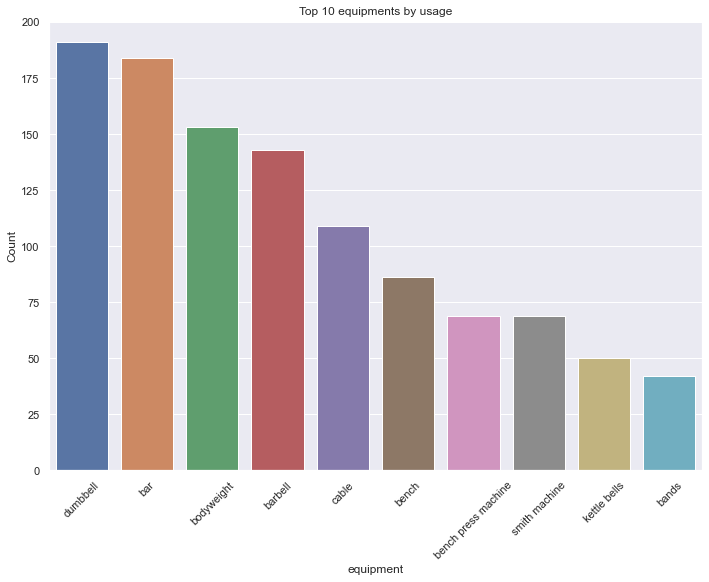

In [323]:
ax = sns.barplot(data = data_viz, x = "equipment", y ="Count")
plt.xticks(rotation=45)
plt.title("Top 10 equipments by usage")

#### TARGETS GYM

In [262]:
exercise_group_df_merged.shape

(1006, 15)

In [263]:
targets = {"exercise":[],"muscle":[], "is_primary":[]}
for index, data in exercise_group_df_merged[["name","muscle"]].iterrows():
    for muscle in data[1]:
        targets["exercise"].append(data[0])
        targets["muscle"].append(muscle)
        targets["is_primary"].append("Yes")

In [264]:
for index, data in exercise_group_df_merged[["name","secondary_muscle"]].iterrows():
    for muscle in data[1]:
        if muscle!="none":
            targets["exercise"].append(data[0])
            targets["muscle"].append(muscle.strip())
            targets["is_primary"].append("No")

In [265]:
target_df = pd.DataFrame.from_dict(targets)
target_df.head()

,exercise,muscle,is_primary
0,dumbbell goblet squat,quadriceps,Yes
1,barbell back squat,quadriceps,Yes
2,barbell back squat,gluteus maximus,Yes
3,leg extension,quadriceps,Yes
4,dumbbell lunge,quadriceps,Yes


In [266]:
target_df.is_primary.value_counts()

No     2602
Yes    1312
Name: is_primary, dtype: int64

In [267]:
target_df.isnull().sum()

exercise      0
muscle        0
is_primary    0
dtype: int64

In [268]:
target_df["relation"] = "TARGETS"

In [269]:
target_df[["exercise", "relation", "muscle", "is_primary"]].to_csv("Data_KG_Creation/rel_TARGETS.csv", index = False)

In [327]:
data_viz = target_df[target_df.is_primary=="Yes"].groupby('muscle')['exercise'].count().reset_index().rename(columns = {"exercise":"Count"}).sort_values("Count", ascending = False).head(10)
data_viz.head()

,muscle,Count
30,shoulders,151
27,quadriceps,134
9,chest,114
36,triceps brachii,92
1,abs,78


Text(0.5, 1.0, 'Top 10 muscles by usage')

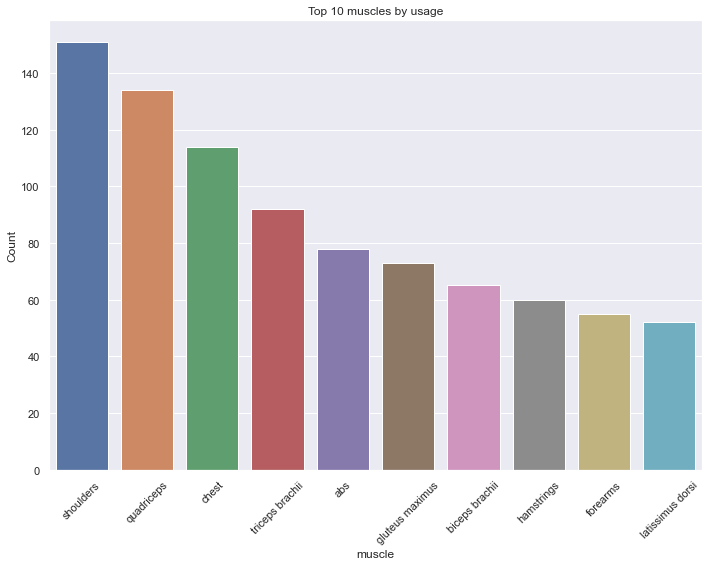

In [328]:
ax = sns.barplot(data = data_viz, x = "muscle", y ="Count")
plt.xticks(rotation=45)
plt.title("Top 10 muscles by usage")

### TARGETS YOGA

In [270]:
yoga_details_full[["name", "Anatomies"]]

,name,Anatomies
0,child's pose,"[thighs, hips, ankles]"
1,crow pose,"[belly, arms, wrists, hands, back, abs, flexors]"
2,cat pose,"[neck, kidneys, belly, pelvis, spine, back, hi..."
3,cow pose,"[neck, kidneys, belly, pelvis, spine, back, hi..."
4,corpse pose,NaN
...,...,...
87,dolphin plank pose,"[neck, arms, hands, back, shoulders, heart, abs]"
88,extended hand-to-big-toe pose,"[ankles, hamstrings, arms, knees, hands, back,..."
89,fire log pose,"[belly, gluteus maximus, hips]"
90,extended side angle pose,"[belly, ankles, knees, spine, abs, legs]"


In [271]:
targets_yoga = {"name":[],"anatomy":[]}
for index, data in yoga_details_full[["name", "Anatomies"]].dropna().iterrows():
    for anatomy in data[1]:
        targets_yoga["name"].append(data[0])
        targets_yoga["anatomy"].append(anatomy)
#         targets_yoga["anatomy"].append(anatomy.split("|")[0])

In [272]:
targets_yoga = pd.DataFrame.from_dict(targets_yoga)
targets_yoga.head()

,name,anatomy
0,child's pose,thighs
1,child's pose,hips
2,child's pose,ankles
3,crow pose,belly
4,crow pose,arms


In [273]:
# targets_yoga.anatomy = targets_yoga.anatomy.str.lower()

In [274]:
targets_yoga["relation"] = "TARGETS"

In [275]:
targets_yoga.head()

,name,anatomy,relation
0,child's pose,thighs,TARGETS
1,child's pose,hips,TARGETS
2,child's pose,ankles,TARGETS
3,crow pose,belly,TARGETS
4,crow pose,arms,TARGETS


In [276]:
targets_yoga[["name", "relation", "anatomy"]].to_csv("Data_KG_Creation/rel_TARGETS_yoga.csv", index = False)

#### PRECEDES

In [277]:
yoga_details_full[["name", "preparatory_poses"]]

,name,preparatory_poses
0,child's pose,[Balasana can appear at the beginning of class...
1,crow pose,[Chaturanga Dandasana (Four-Limbed Staff Pose)]
2,cat pose,[Tabletop]
3,cow pose,"[Marjaryasana (Cat Pose), Balasana (Child’s Po..."
4,corpse pose,[Any poses you practiced prior to Savasana ser...
...,...,...
87,dolphin plank pose,[Plank Pose]
88,extended hand-to-big-toe pose,"[Virabhadrasana I (Warrior Pose I), Tadasana (..."
89,fire log pose,"[Baddha Konasana, Supta Baddha Konasana]"
90,extended side angle pose,[Since Extended Side Angle engages nearly the ...


In [278]:
yoga_details_full[yoga_details_full.name=="extended side angle pose"]["preparatory_poses"].values

array([list(['Since Extended Side Angle engages nearly the entire body, you want to first incorporate poses into your practice that address full-body movement, including', 'Surya Namaskar A', '. Also emphasize poses that lengthen your side body and stretch your hamstrings, hip flexors, and quadriceps.'])],
      dtype=object)

In [279]:
preparatory = {'yoga1':[], 'yoga2':[]}
for index, data in yoga_details_full[["name", "followup_poses"]].iterrows():
    for poses in data[1]:
        if poses:
            if "beginning" not in poses or "Surya Namaskar" not in poses:
                
                
                if "(" in poses:
                    req_pose = poses[poses.find("(")+1:poses.find(")")].lower()
                elif len(poses)<=30:
                    req_pose = poses.lower()
                else:
                    req_pose = poses.split(" ")[0].lower()
                pose = unifyYogaNames(req_pose)#poses.split("(")[-1].replace(")", "").lower()
                
                if len(pose)>4: #atleast the word pose should be there and plank is the lowest
                    preparatory["yoga1"].append(data[0])
                    preparatory["yoga2"].append(pose)
                
                

In [280]:
preparatory_yoga = pd.DataFrame.from_dict(preparatory)
preparatory_yoga.head()

,yoga1,yoga2
0,crow pose,four-limbed staff pose
1,cat pose,cow pose
2,cow pose,cat pose
3,cow pose,child's pose
4,cow pose,standing forward bend


In [281]:
preparatory_yoga.yoga2.unique()

array(['four-limbed staff pose', 'cow pose', 'cat pose', "child's pose",
       'standing forward bend', 'sphinx pose', 'locust pose',
       'upward-facing dog pose', 'bridge pose', 'cobra pose',
       'downward-facing dog pose',
       'wind-relieving pose, in which you lie on your back with your knees drawn into your chest',
       'staff pose', 'reverse plank', 'supported shoulderstand',
       'wheel pose', 'seated forward bend', 'happy baby pose',
       'reclining hand-to-big-toe pose', 'chair pose', 'trikonasana',
       'bound angle pose', "bharadvaja's twist", "bharadvaja's twist)",
       'supta', 'cow face pose', 'garland pose', 'lotus pose',
       'pose dedicated to the sage marichi',
       'half lord of the fishes pose', 'eagle pose',
       'reclining bound angle pose', 'standing poses', 'mountain pose',
       'wide-legged forward bend', 'wide-angle seated forward bend',
       'upward-facing dog', 'pose dedicated to the sage marichi i',
       'warrior 2 pose', 'rev

In [282]:
preparatory_yoga["relation"] = "PRECEDES"

In [283]:
preparatory_yoga[["yoga1","relation","yoga2"]].to_csv("Data_KG_Creation/rel_PRECEDS_yoga.csv", index = False)

#### FOLLOWS

In [284]:
yoga_details_full[["name", "preparatory_poses"]]

,name,preparatory_poses
0,child's pose,[Balasana can appear at the beginning of class...
1,crow pose,[Chaturanga Dandasana (Four-Limbed Staff Pose)]
2,cat pose,[Tabletop]
3,cow pose,"[Marjaryasana (Cat Pose), Balasana (Child’s Po..."
4,corpse pose,[Any poses you practiced prior to Savasana ser...
...,...,...
87,dolphin plank pose,[Plank Pose]
88,extended hand-to-big-toe pose,"[Virabhadrasana I (Warrior Pose I), Tadasana (..."
89,fire log pose,"[Baddha Konasana, Supta Baddha Konasana]"
90,extended side angle pose,[Since Extended Side Angle engages nearly the ...


In [285]:
follow_up = {'yoga1':[], 'yoga2':[]}
for index, data in yoga_details_full[["name", "preparatory_poses"]].iterrows():
    for poses in data[1]:
        if poses:
            
            if "(" in poses:
                req_pose = poses[poses.find("(")+1:poses.find(")")].lower()
            elif len(poses)<=30:
                req_pose = poses.lower()
            else:
                req_pose = poses.split(" ")[0].lower()

            pose = unifyYogaNames(req_pose) #
#             if poses=='Supta Padangusthasana':
#                 print(poses)
#                 print(req_pose)
#                 print(pose)
                
            follow_up["yoga1"].append(data[0])
            follow_up["yoga2"].append(pose)

In [286]:
follow_up_yoga = pd.DataFrame.from_dict(follow_up)
follow_up_yoga.head()

,yoga1,yoga2
0,child's pose,child's pose
1,crow pose,four-limbed staff pose
2,cat pose,tabletop
3,cow pose,cat pose
4,cow pose,child's pose


In [287]:
follow_up_yoga.yoga2.unique()

array(["child's pose", 'four-limbed staff pose', 'tabletop', 'cat pose',
       'easy pose', 'any', 'mountain pose', 'before', 'baddha',
       'cobra pose', 'locust pose', 'sphinx pose',
       'reclining hand-to-big-toe pose', 'downward-facing dog pose',
       'standing forward bend', 'seated forward bend', 'bound angle pose',
       'hero pose', 'tree pose', 'pose dedicated to the sage marichi',
       'half lord of the fishes pose', 'leg position', 'plank pose',
       'though', 'eagle pose', 'reclining bound angle pose', 'practice',
       'to', 'garland pose', 'crow pose',
       'wide-angle seated forward bend', 'wheel pose',
       'supported headstand', 'reverse plank', 'stretch', 'plow pose',
       'bridge pose', 'prior', 'standing', 'you', "bharadvaja's twist",
       'big toe pose', 'wide-legged forward bend', 'head-to-knee pose',
       'reclining big toe pose', 'wide angle seated forward bend',
       'pose dedicated to the sage marichi i', 'rope pose', 'fish pose',
   

In [288]:
follow_up_yoga[follow_up_yoga.yoga1=="extended hand-to-big-toe pose"]

,yoga1,yoga2
199,extended hand-to-big-toe pose,warrior 1 pose
200,extended hand-to-big-toe pose,mountain pose
201,extended hand-to-big-toe pose,reclining hand-to-big-toe pose
202,extended hand-to-big-toe pose,tree pose


In [289]:
follow_up_yoga["relation"] = "FOLLOWS"

In [290]:
follow_up_yoga[["yoga1","relation","yoga2"]].to_csv("Data_KG_Creation/rel_FOLLOWS_yoga.csv", index = False)

# Workout rountines

In [291]:
workout_dict = {
                 'id':[], 'exercises':[]}

with open('..\\fitness_kg\\Extracted\\Gym\\workout.jsonl', 'r', encoding="utf8") as json_file:
    json_list = list(json_file)
    
for json_str in json_list:
    result = json.loads(json_str)
    workout_dict['id'].append(result['id'])
    workout_dict['exercises'].append(result['exercises'])    

workout_df = pd.DataFrame.from_dict(workout_dict)    

In [292]:
workout_df.head()

,id,exercises
0,https://www.muscleandstrength.com/workouts/ful...,[https://www.muscleandstrength.com/exercises/b...
1,https://www.muscleandstrength.com/workouts/6-d...,[https://www.muscleandstrength.com/exercises/b...
2,https://www.muscleandstrength.com/workouts/6-d...,[https://www.muscleandstrength.com/exercises/d...
3,https://www.muscleandstrength.com/workouts/6-d...,[https://www.muscleandstrength.com/exercises/s...
4,https://www.muscleandstrength.com/workouts/6-d...,[https://www.muscleandstrength.com/exercises/m...


In [293]:
workout_df['id'] = workout_df.id.apply(lambda x:x.split("/")[-1])

In [294]:
workout_df.shape

(913, 2)

In [295]:
workout_df = workout_df.explode('exercises').reset_index(drop = True)
workout_df.shape

(5524, 2)

In [296]:
workout_df_mapped = workout_df.merge(exercise_group_df_merged[['name','url']], left_on="exercises", right_on='url').drop(columns=["url", "exercises"])

In [298]:
workout_df_mapped.head()

,id,name
0,full-body-bodyweight-workout.html_0,bodyweight jump squat
1,jai-courtney-workout-terminator-genisys_0,bodyweight jump squat
2,3-day-kettlebell-bodyweight_2,bodyweight jump squat
3,best-hiit-workouts_2,bodyweight jump squat
4,30-day-military-athlete-workout-program_1,bodyweight jump squat


In [299]:
workout_df_mapped["relation"] = "INCLUDES"

In [300]:
workout_df_mapped.rename(columns = {'id':'workout_name', 'name':'exercise'}, inplace = True)

In [301]:
workout_df_mapped[['workout_name','relation', 'exercise']].to_csv("Data_KG_Creation/rel_INCLUDES_exercise.csv", index = False)

> change the apostrophe everywhere

> do mapping of muscles

> check the follows and preceds relation

> uses -> implement manual checking of machines